### Background & Context

Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that the bank could improve upon those areas

### Objective
The objective is to build a classification model to predict if a customer is going to churn or not

### Data Dictionary
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

### 1.1 Load Libraries

In [661]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#Libraries to help scale data
from sklearn.preprocessing import StandardScaler

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# library to help with imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### 1.2. Import the dataset

In [1257]:
new_data  = pd.read_csv('BankChurners.csv') # Import the dataset named BankChurners.csv
data = new_data.copy()
data.head()  # view the first 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### 1.3 Check the Dimension of data

In [508]:
data.shape # Check the shape of the data

(10127, 21)

In [1258]:
# Check if all Client numbers are unique
data['CLIENTNUM'].nunique()

10127

### Observation
- There are 10,127 rows and 20 columns in this dataset and they are also unique customers

In [1259]:
# We will go ahead and drop this column as we won't be using it
data.drop(['CLIENTNUM'],axis=1,inplace=True)

### 1.4 Check the Information about the data

In [472]:
pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values']) # Number of missing values in the data

,Number of missing values
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [31]:
data.info() # Check information on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [32]:
data.nunique() # Check the number of Unique values in dataset

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [34]:
data.describe().T # Five(5) number summary of the quantitative variables

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [371]:
# Function to Calculate the Coefficient of Variation
def coef_var(col):
    return round(data[col].std()/data[col].mean() * 100, 3)

columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
          'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for colname in columns:
    cf = coef_var(colname)
    print('The coefficient of variation for', colname, 'is :' , cf, '%')

The coefficient of variation for Customer_Age is : 17.305 %
The coefficient of variation for Dependent_count is : 55.362 %
The coefficient of variation for Months_on_book is : 22.229 %
The coefficient of variation for Total_Relationship_Count is : 40.77 %
The coefficient of variation for Months_Inactive_12_mon is : 43.167 %
The coefficient of variation for Contacts_Count_12_mon is : 45.054 %
The coefficient of variation for Credit_Limit is : 105.292 %
The coefficient of variation for Total_Revolving_Bal is : 70.088 %
The coefficient of variation for Avg_Open_To_Buy is : 121.71 %
The coefficient of variation for Total_Amt_Chng_Q4_Q1 is : 28.845 %
The coefficient of variation for Total_Trans_Amt is : 77.136 %
The coefficient of variation for Total_Trans_Ct is : 36.19 %
The coefficient of variation for Total_Ct_Chng_Q4_Q1 is : 33.429 %
The coefficient of variation for Avg_Utilization_Ratio is : 100.29 %


In [36]:
def check_value_counts(col): # Function to check value_counts of variables
    print(data[col].value_counts())
    
for val in data.columns: 
    check_value_counts(val)
    print('-'*35)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
-----------------------------------
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64
-----------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
-----------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
-----------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate  

### Observations
- There are 14 numerical and 6 object variables within this dataset


- The mean of 'Customer_Age', 'Dependent_count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio', are greater than the median which suggests a right skewed distribution. 


- The coefficient of variation lets us know how spread out values are in relation to the mean. Most of our numerical variables have well spread out datapoints, however, 'Credit_Limit', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio' have coefficient of variations over 100% which suggests the existence of outliers within these variables. 


-  'Attrition_Flag', 'Gender', 'Dependent_count','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', variables would need to be converted to category datatype as they contain finite number of possible values. 


- The following columns, 'Education_Level', 'Marital_Status', 'Income_Category' have 'unknown' which also signify missing values. This would be treated using KNN algorithm

### 1.5 Data Pre-Processing & Feature Engineering

In [1260]:
#Convert object columns to category datatype
categories = ['Attrition_Flag', 'Gender', 'Dependent_count','Education_Level', 'Marital_Status', 'Income_Category', 
              'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
data = data.apply(lambda col: col.astype('category') if col.name in categories else col)

In [1261]:
# Replace Unknown values with NaN
cols = ['Education_Level', 'Marital_Status', 'Income_Category']

for col in cols:
    data.loc[data[col] == 'Unknown', col] = np.nan 

### 1.6 Exploratory Data Analysis (Univariate Analysis)

In [47]:
# Function to create Histogram and Boxplot Visualizations
def hist_box(variable, bins, xlabel):
    plt.figure(figsize=(6,3)) # set the figure size
    sns.distplot(variable, bins=bins) # Plot the histogram

    plt.axvline(variable.mean(),color='green',label='Mean') # Draw lines on the plot for mean and median of the variable
    plt.axvline(variable.median(),color='blue',label='Median')

    plt.xlabel(xlabel) # label the x-axis
    plt.ylabel('Frequency') # label the y-axis
    plt.legend() # Plot the legend
    plt.title('Measure of Central Tendency and Dispersion') # Display plot title
    plt.show() # Display Plot
    
    plt.figure(figsize=(6,3)) # set the figure size
    sns.boxplot(variable) # Plot BoxPlot

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Customer_Age)

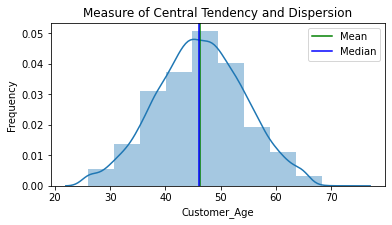

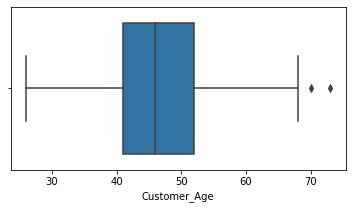

In [50]:
hist_box(data['Customer_Age'], 10, 'Customer_Age')

### Observations

- The banks customer age variable has a normal-like distribution.

- There isn't much difference between the mean and median of the values

- The average age of a customer is 46 yrs

- Most customers are within the ages 41 and 52 yrs old

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Months_on_book)

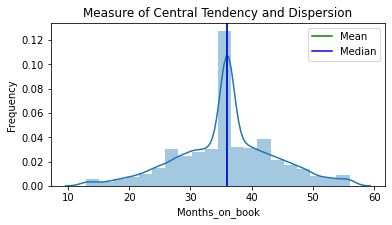

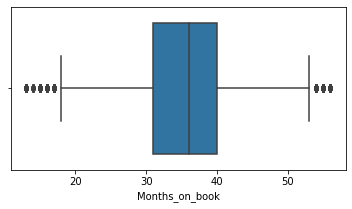

In [58]:
hist_box(data['Months_on_book'], 20, 'Months_on_book')

### Observations

- On average, credit cards usually expire 3 years (36 months) after the card was issued. From the data, we can see that this assumption is valid as a large number of customers relationship with the bank lasts for about 36 months. This suggests that these customers do not renew their credit cards when it reaches expiration 3 years after issue.

- Most customers have a relationship with the bank for between 31 and 40 months.

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Credit_Limit)

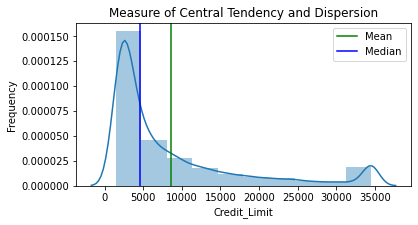

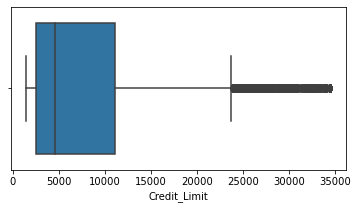

In [59]:
hist_box(data['Credit_Limit'], 10, 'Credit_Limit')

### Observations

- From the data, we can see that there are customers the bank extends large credit limits to resulting in outliers within this variable. 

- The average credit limit given to customers is about 4,550 dollars

- As earlier mentioned, there are outliers within this variable with some customers having a credit limit as high as 34,500 dollars

- Most customers however have credit limits between 2,555 and 11,067 dollars

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_Revolving_Bal)

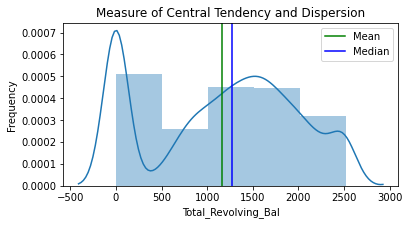

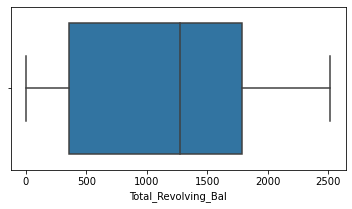

In [74]:
hist_box(data['Total_Revolving_Bal'], 5, 'Total_Revolving_Bal')

### Observations

- This variable has a bimodal distribution. The first peak represents customers who have a low total revolving balance that is, the amount carried over month over month by these customers is low. The second peak however represents customers who have a high total revolving balance. This high amount for some customers may not be such a problem for the bank as the amount is relative to the credit limit of these customers. This will be further investigated. 

- The average total revolving balance of all customers about is 1,276 dollars

- Most customers however have a total revolving balance between 359 and 1,784 dollars

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Avg_Open_To_Buy)

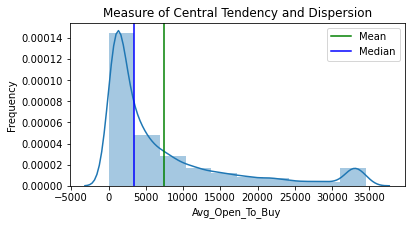

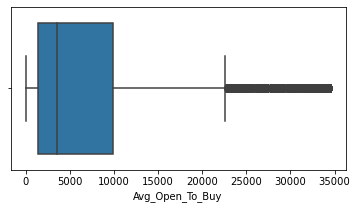

In [75]:
hist_box(data['Avg_Open_To_Buy'], 10, 'Avg_Open_To_Buy')

### Observations

- From the data, we can see that there are customers with large average open to buy values on the right side suggesting that there are outliers within this variable.  

- The average open to buy amount of all customers is about 3,474 dollars

- Most customers however have average open to buy between 1,324 and 9,859 dollars

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_Amt_Chng_Q4_Q1)

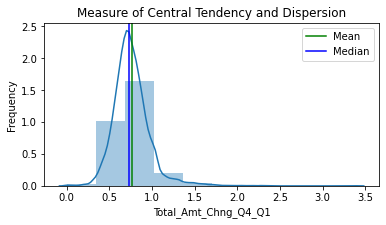

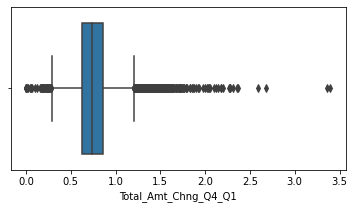

In [80]:
hist_box(data['Total_Amt_Chng_Q4_Q1'], 10, 'Total_Amt_Chng_Q4_Q1')

### Observations

- On average, there was a 73.6% increase in the banks customers transaction spend between Q1 and Q4

- There are some outliers within this variable on the right side with some customers transaction spend rising as much as 340% between Q1 and Q4

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_Trans_Amt)

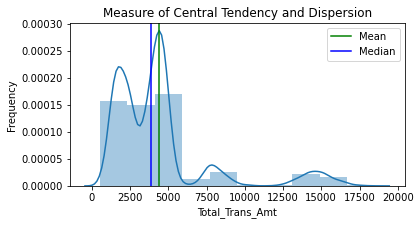

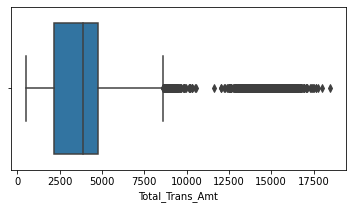

In [81]:
hist_box(data['Total_Trans_Amt'], 10, 'Total_Trans_Amt')

### Observations

- The average amount spent by customers in the last 12 months is 3,899 dollars

- There are some outliers within this variable on the right side with some customers transaction spend rising as much as 18,484 dollars

- Most customers spend between 2,156 and 4,741 dollars

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_Trans_Ct)

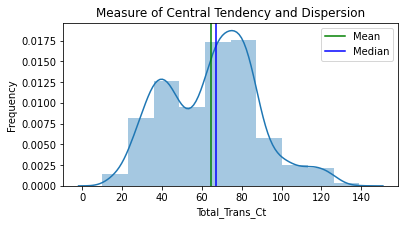

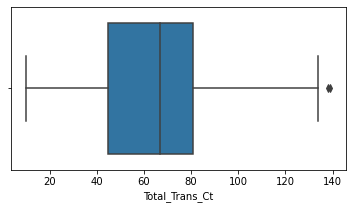

In [82]:
hist_box(data['Total_Trans_Ct'], 10, 'Total_Trans_Ct')

### Observations

- The average number of transacions made by customers in the last 12 months is 67

- Most customers made between 45 and 81 transactions in the last 12 months

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Total_Ct_Chng_Q4_Q1)

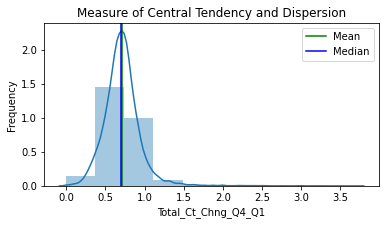

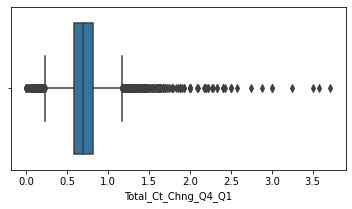

In [83]:
hist_box(data['Total_Ct_Chng_Q4_Q1'], 10, 'Total_Ct_Chng_Q4_Q1')

### Observations

- On average, the number of transactions by customers increased by 70% between Q1 and Q4

- There are some outliers within this variable on the right side with some customers transaction spend rising as much as 370% between Q1 and Q4

###  Visualization of Central Tendency and Dispersion Using Histogram & Boxplot (Avg_Utilization_Ratio)

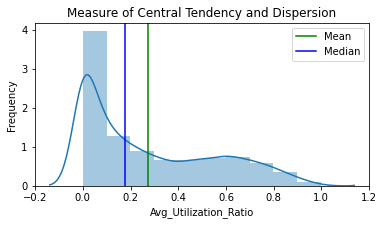

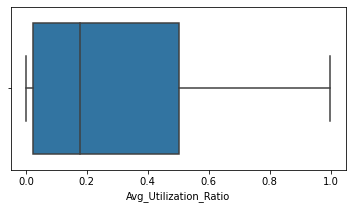

In [84]:
hist_box(data['Avg_Utilization_Ratio'], 10, 'Avg_Utilization_Ratio')

### Observations

- This measures how much of the given credit limit is the customer actually using. 

- On average, most customers used about 17.6% of their credit limit in the last 12 months

- There are some outliers within this variable on the right side with some customers using as much as 99% of their credit limit

- Most customers used between 2.3% and 50% of their available credit limits

In [85]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

###  Visualization of Categorical Variables Using Barplot (Attrition_Flag)

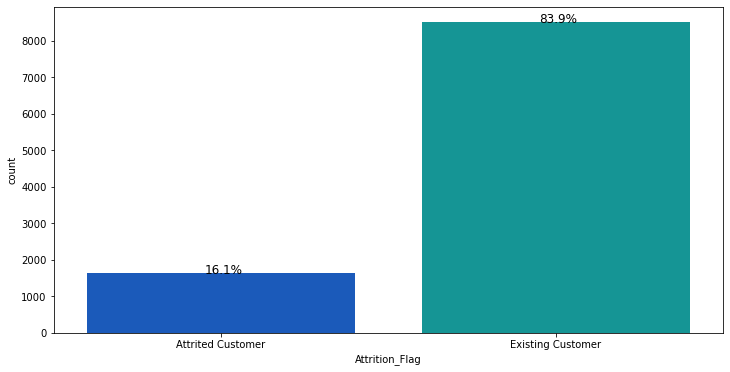

In [86]:
# Plot barplot for Attrition_Flag Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Attrition_Flag'],palette='winter')
perc_on_bar(ax,data['Attrition_Flag'])

### Observations

- 16% of Thera banks credit card customers attrited in the last 12 months


- As this is our dependent variable, the positive and negative split will be:

 - ***Positive Class (1)***: Customer attrited.
 - ***Negative Class (0)***: Customer is existing.
 
 
- The classes are however imbalanced as such, we would treat this using upsampling or downsampling

###  Visualization of Categorical Variables Using Barplot (Gender)

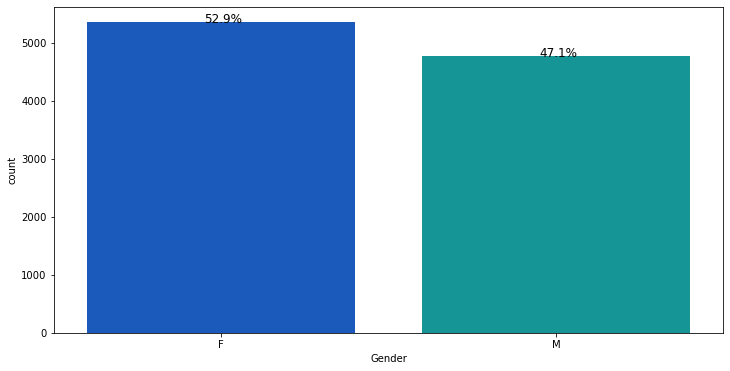

In [87]:
# Plot barplot for Gender Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Gender'],palette='winter')
perc_on_bar(ax,data['Gender'])

### Observations

- 53% of Thera banks credit card customers are of the female gender while 47% are male

###  Visualization of Categorical Variables Using Barplot (Dependent_count)

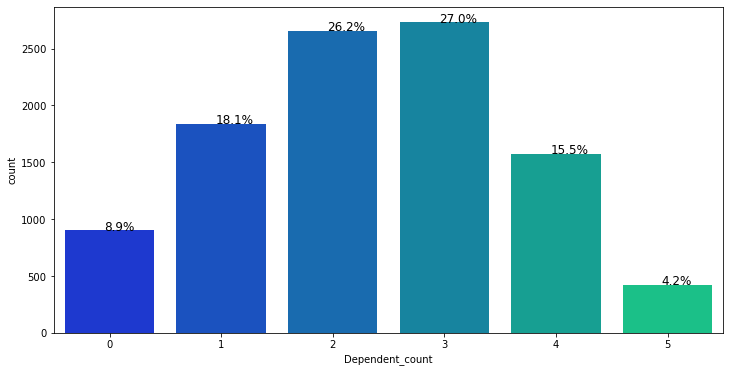

In [88]:
# Plot barplot for Dependent_count Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Dependent_count'],palette='winter')
perc_on_bar(ax,data['Dependent_count'])

### Observations

- About half of the banks customers have either 2(26%) or 3(27%) dependents
- 9% of customers have no dependents and 4% hav 5 dependents

###  Visualization of Categorical Variables Using Barplot (Education_Level)

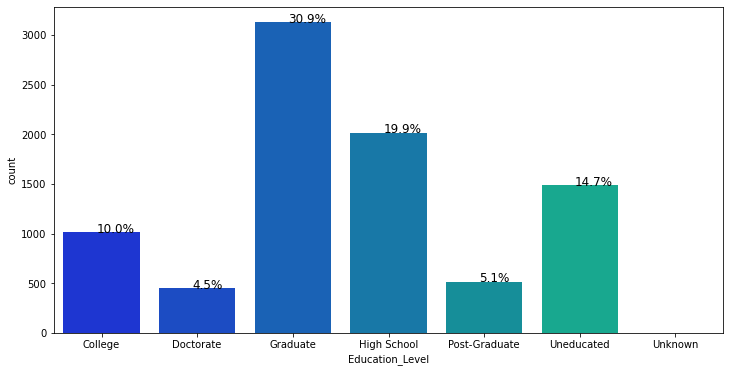

In [89]:
# Plot barplot for Education_Level Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Education_Level'],palette='winter')
perc_on_bar(ax,data['Education_Level'])

### Observations

- 31% of the banks credit card customers have graduate degrees, 20% of the customers are educated up to high school level, 10% have college degrees and 14.7% of customers are uneducated. 
- Interestingly, customers that are highly educated(Post-Grad and Doctorate degrees) make up just 9.6% of the customer base. 

###  Visualization of Categorical Variables Using Barplot (Marital_Status)

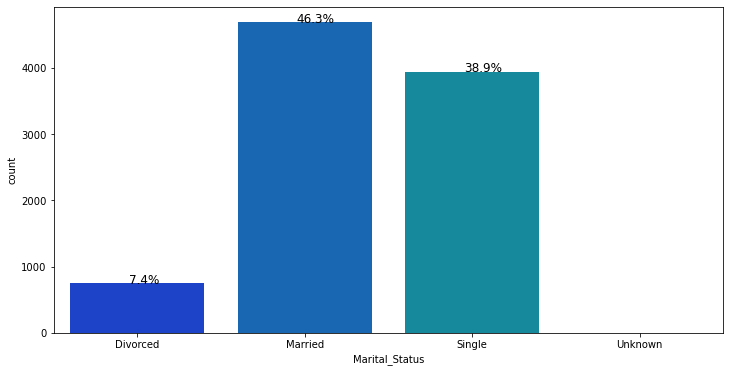

In [94]:
# Plot barplot for Marital_Status Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Marital_Status'],palette='winter')
perc_on_bar(ax,data['Marital_Status'])

### Observations

- Almost half (46%) of the banks credit card customers are married.

###  Visualization of Categorical Variables Using Barplot (Income_Category)

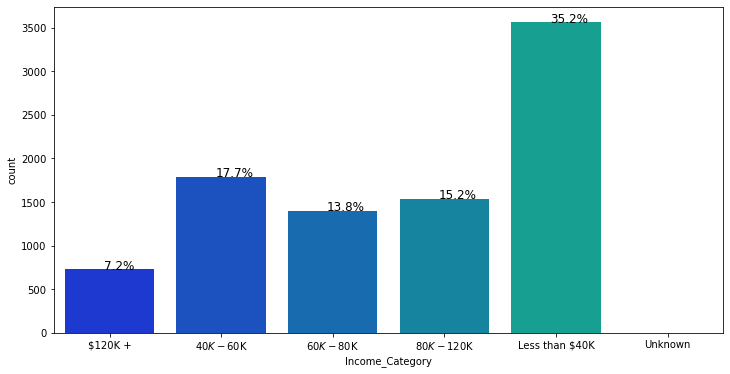

In [95]:
# Plot barplot for Income_Category Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Income_Category'],palette='winter')
perc_on_bar(ax,data['Income_Category'])

### Observations

- 35.2% of the banks credit card customers earn less than 40K annually with 7.2% earning over 120k annually

###  Visualization of Categorical Variables Using Barplot (Card_Category)

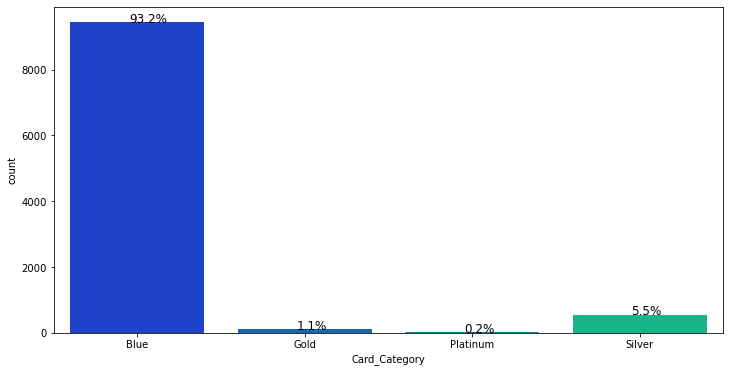

In [96]:
# Plot barplot for Card_Category Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Card_Category'],palette='winter')
perc_on_bar(ax,data['Card_Category'])

### Observations

- 93% of the banks customers are subscribed to te Blue card category. Given that most customers are low income earners and do not have advanced education, we can say that the Blue card category is the entry level product for the banks customers. 

###  Visualization of Categorical Variables Using Barplot (Total_Relationship_Count)

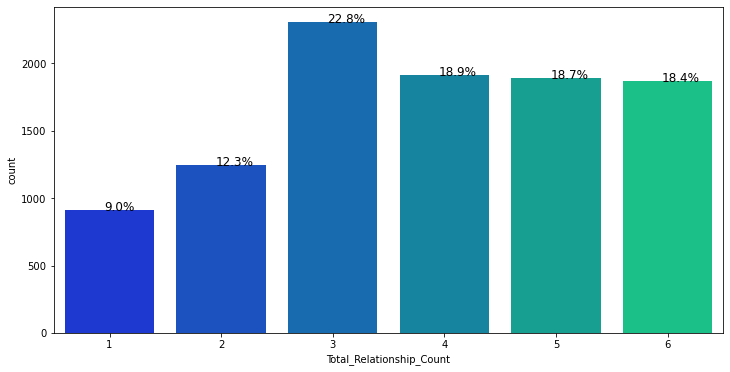

In [97]:
# Plot barplot for Total_Relationship_Count Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Total_Relationship_Count'],palette='winter')
perc_on_bar(ax,data['Total_Relationship_Count'])

### Observations

- 22.8% of customers have 3 products with the bank
- 18.9%, 18.7% and 18.4% of customers have 4,5 and 6 products with the bank respectively
- Just 9% of customers have 1 product with the bank

###  Visualization of Categorical Variables Using Barplot (Months_Inactive_12_mon)

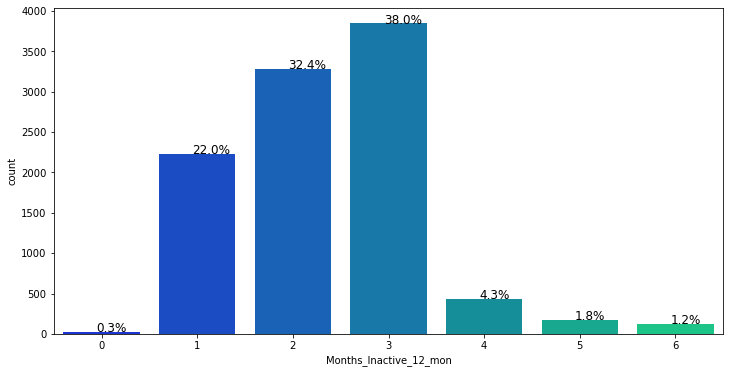

In [98]:
# Plot barplot for Months_Inactive_12_mon Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Months_Inactive_12_mon'],palette='winter')
perc_on_bar(ax,data['Months_Inactive_12_mon'])

### Observations

- 38% of customers were inactive for 3 months within the last 12 months. That is, these customers did not make use of their credit cards for 3 months within the last 12 months. It would be interesting to see if there is a relationship between card usage and attrition.

###  Visualization of Categorical Variables Using Barplot (Contacts_Count_12_mon)

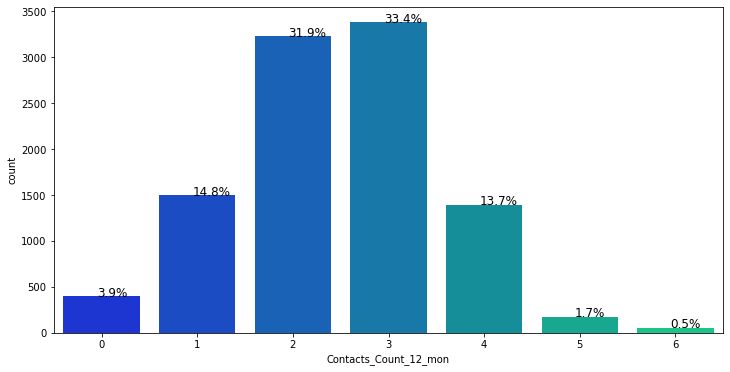

In [99]:
# Plot barplot for Contacts_Count_12_mon Variable
plt.figure(figsize=(12,6)) # set the figure size
ax = sns.countplot(data['Contacts_Count_12_mon'],palette='winter')
perc_on_bar(ax,data['Contacts_Count_12_mon'])

### Observations

- In the last 12 months, most credit card customers made either 2(32%) or 3(33%) contacts to the bank

### 1.7  Exploratory Data Analysis (Bivariate Analysis)

###  HeatMap 

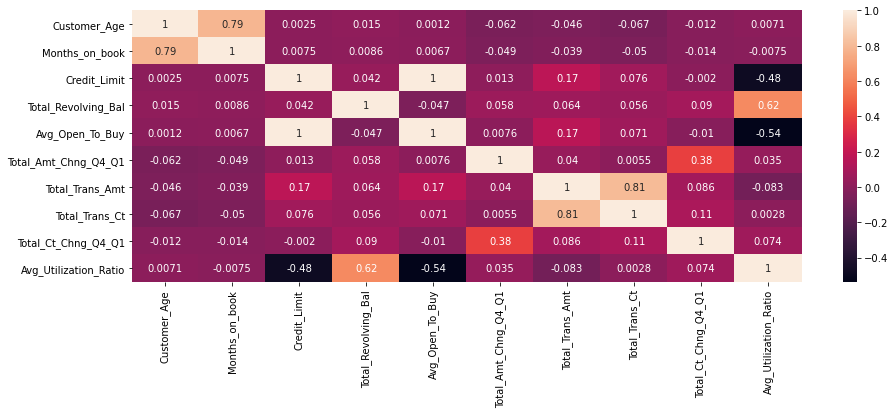

In [100]:
# Diaplay Heatmap of numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Pairplot

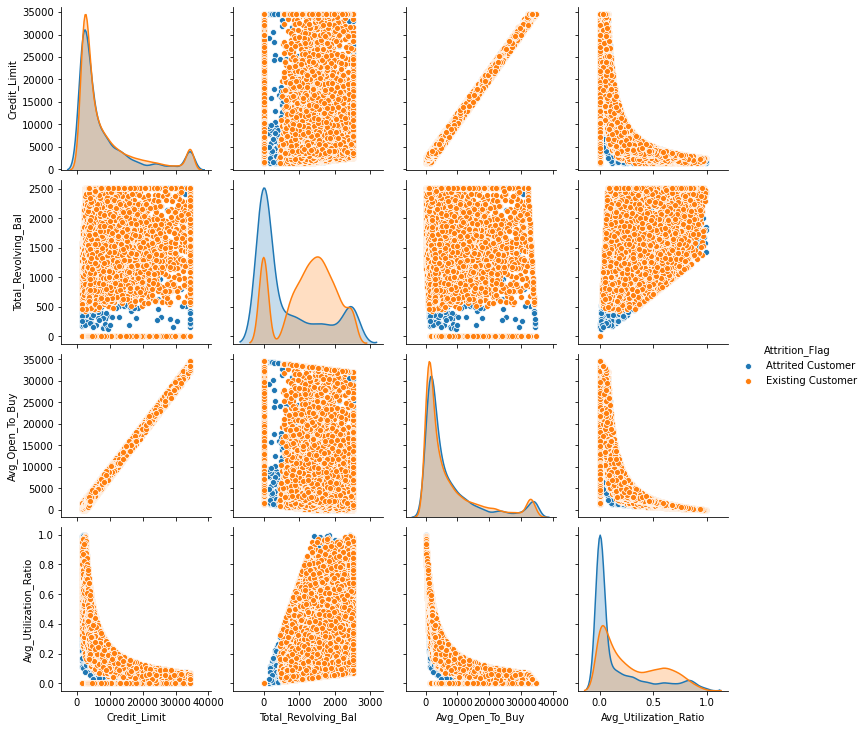

In [177]:
#Scatterplot and distribution of some key numerical variables
colss = data[['Attrition_Flag','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio']]
sns.pairplot(data=colss,hue='Attrition_Flag')

### Observation

- There are a few strong positive and negative correlations amongst our numerical variables. Customer_Age for example is highly correlated with Months_on_book which makes sense as the older a customer is the more likely they are to have been a customer of te bank for a longer period of time than a younger customer. 


- There is a very strong correlation between Credit Limit and Average Open to Buy. 


- Total Revolving Balance and Average Utilization Ratio also have a strong positive correlation with each other. This suggests that as the amount carried over month over month on a customers account increases, the amount of given credit the customer actually uses also increases


- We can also see that there is a negative correlation between Average Open to Buy and Average Utilization Ratio. This makes sense as having available credit to use on the card at the end of 12 months suggests that card usage may not have been at the highest level over the same period  


- It is also logical that Total_Trans_Amt and Total_Amt_Chng_Q4_Q1 are correlated as Total_Amt_Chng_Q4_Q values are derived from Total_Trans_Amt. We may have to drop one of these columns. 

### Attrition_Flag vs All Numerical Variables

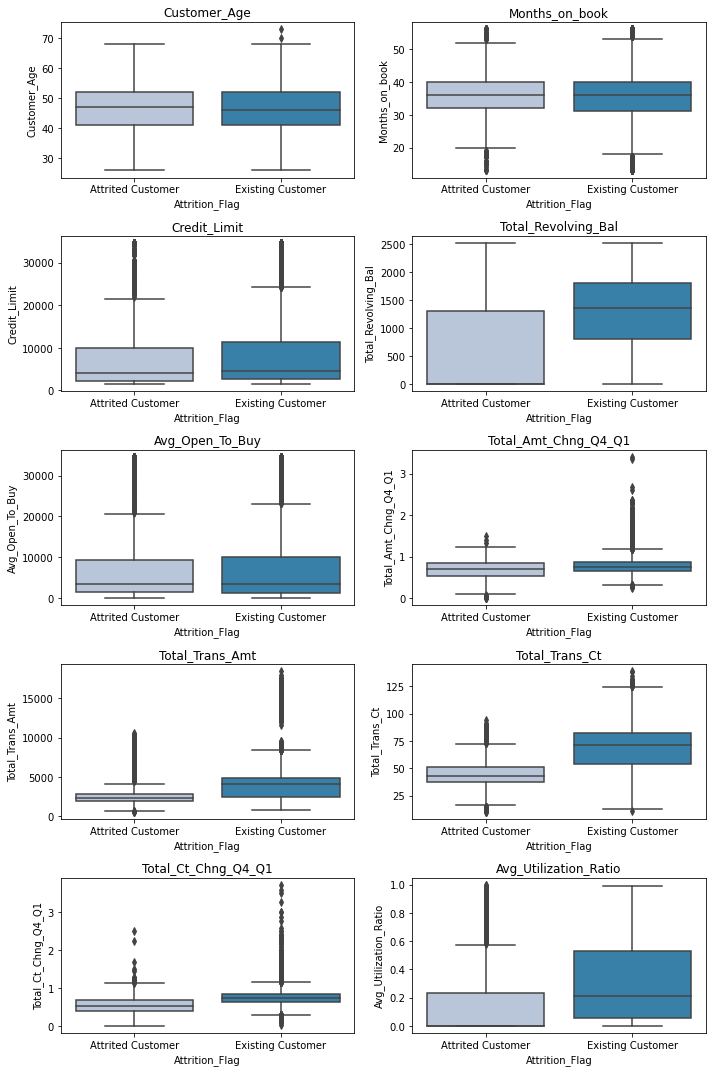

In [111]:
# Boxplot to check relationship between all numerical variables and Target Variable
cols = data[['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(10,15))

for i, variable in enumerate(cols):
                     plt.subplot(5,2,i+1)
                     sns.boxplot(data['Attrition_Flag'],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Observation

- There isn't much difference in age, the number of months on book and average open to buy between customers who attrited and customers who are still existing


- Customers who attrited were given slightly less credit limit on average than customers who are still existing


- On average, existing customers have a much higher Total Revolving Balance than customers who attrited.


- Customers with lower transaction amount spend and lower change in transaction spend between Q1 and Q4 were more likely to attrite. The same can also be said with customers with low number of transactions and low change in number of transactions between Q1 nad Q4. 


- On average, customers who did not use much of their credit limit were more likely to attrite

### Attrition_Flag vs All Categorical Variables

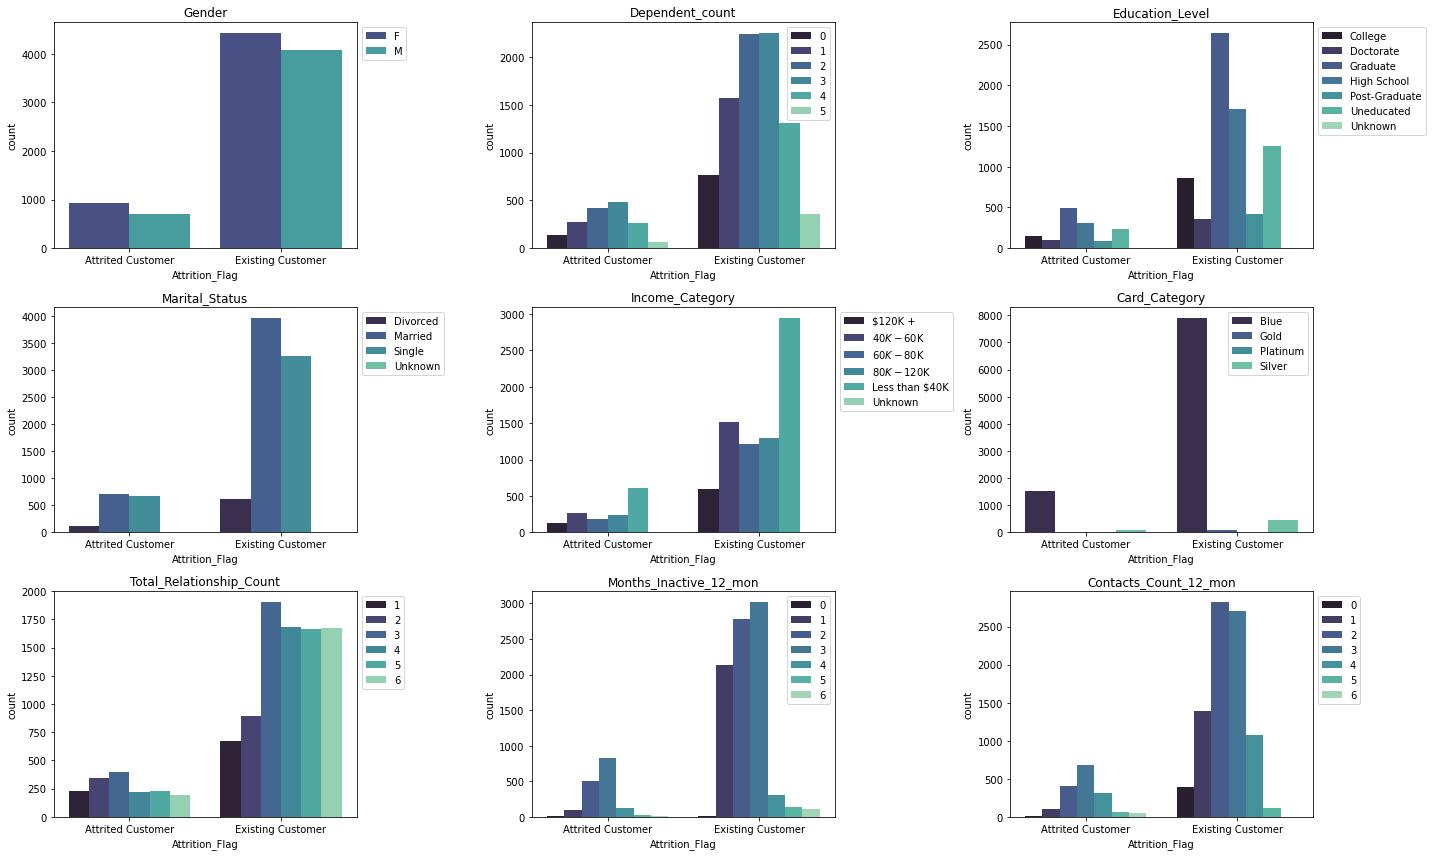

In [126]:
#Barplot to chcek relationship between dependent variable and all categorical variables
cols = data[['Gender', 'Dependent_count','Education_Level', 'Marital_Status', 'Income_Category', 
              'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']].columns.tolist()
plt.figure(figsize=(20,12))

for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.countplot(data["Attrition_Flag"],hue=data[variable],palette="mako")
                     plt.legend(bbox_to_anchor=(1.00, 1))
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Observation

- There were more Female customers who attrited than male customers  
- Customers with 2 or 3 dependents were more likely to attrite on average
- Customers with Graduate, High School degrees and also Uneducated customers were more likely to attrite
- There isn't much of a difference betweeen married and single customers who attrited.
- Most customers who attrited earned less than 40,000 dollars annually. Customers who earned 120,000 dollars and above were least likely to attrite.
- As previously determined, most of the banks customers use the Blue Card category and as such, were most likely to attrite. However, customers with the Silver card were most likely to remain as existing customers.
- Customers with 2 or 3 products with the bank were most likely to attrite
- Customers who have been inactive for about 2 or 3 months were most likely to attrite
- Most customers who attrited contactacted the bank 3 times

### 1.8  Exploratory Data Analysis (Multivariate Analysis)

### Attrition Flag vs Credit Limit vs Gender

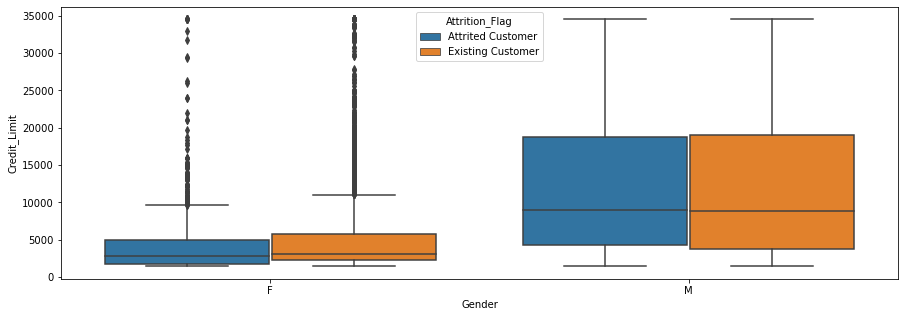

In [152]:
plt.figure(figsize=(15,5)) # Adjust size
sns.boxplot(y='Credit_Limit',x='Gender',hue='Attrition_Flag',data=data) #Plot Boxplot
plt.show() #display plot

### Observation

- From this plot, we can see that Male customers were given higher credit limits than female customers
- As earlier stated, there isnt much of a difference between customers that attrited and existing customers for both male and female customers

### Attrition Flag vs Credit Limit vs Education_Level

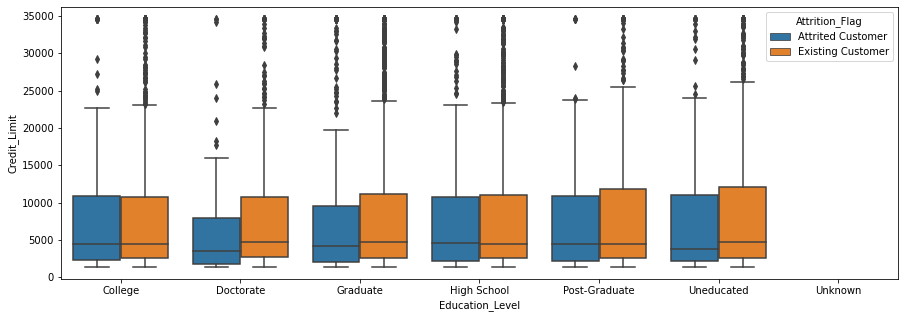

In [153]:
plt.figure(figsize=(15,5)) # Adjust_size
sns.boxplot(y='Credit_Limit',x='Education_Level',hue='Attrition_Flag',data=data) #Plot_Boxplot
plt.show() #display_plot

### Observation

- Customers with Doctorate level education that did not attrite were given a higher credit limit than customers with the same level of education and did attrite.

- Customers with college and High School level of education who attrited and also did not attrite were given similar credit limits. Interestingly however, customers with Doctorate level education that did attrite were given credit limits lower than customers with college and High School level of education.

### Attrition Flag vs Credit Limit vs Income_Category

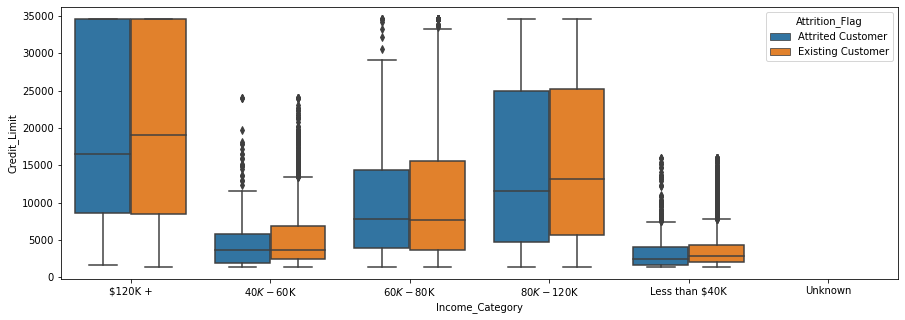

In [155]:
plt.figure(figsize=(15,5)) # Adjust_size
sns.boxplot(y='Credit_Limit',x='Income_Category',hue='Attrition_Flag',data=data) #Plot_Boxplot
plt.show() #display_plot

### Observation

- Customers who attrited and those who did not attrite that earn 120,000 dollars and above annually were given large credit limits levels. However, those that did attrite received less credit limit on average than those that did attrite

### Attrition Flag vs Credit Limit vs Card_Category

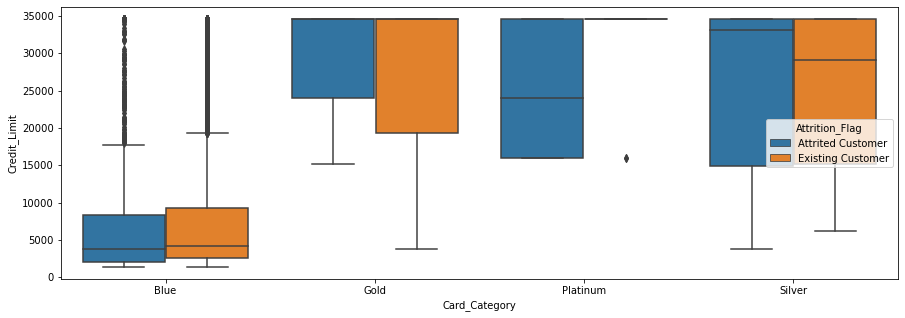

In [156]:
plt.figure(figsize=(15,5)) # Adjust_size
sns.boxplot(y='Credit_Limit',x='Card_Category',hue='Attrition_Flag',data=data) #Plot_Boxplot
plt.show() #display_plot

### Observation

- On average, customers with the silver card category that attrite were given more credit on average than those who didnt attrite. 

- Customers with the Blue card who attrited were given lower credit limit than those who did not attrite

### Attrition Flag vs Avg_Utilization_Ratio vs Total_Revolving_Bal

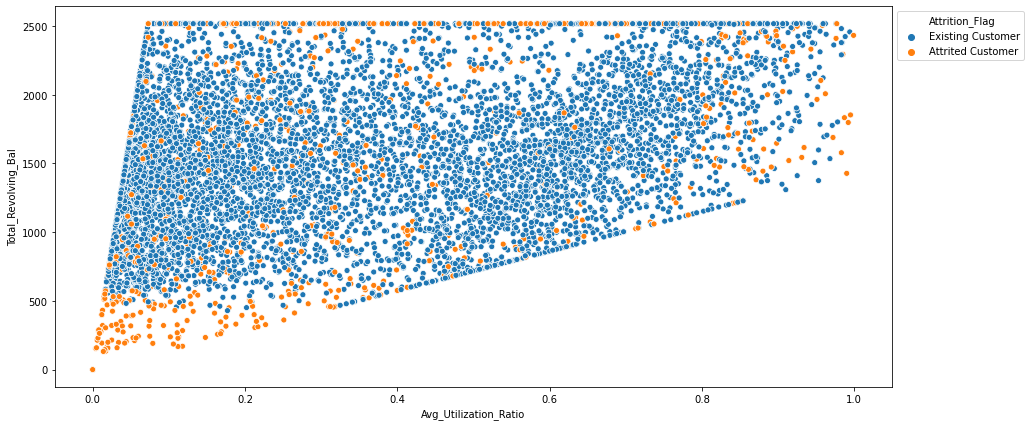

In [1268]:
plt.figure(figsize=(15,7)) #Adjust size
sns.scatterplot(data["Avg_Utilization_Ratio"],data["Total_Revolving_Bal"],hue=data["Attrition_Flag"],ci=0) # Plot scatter plot
plt.legend(bbox_to_anchor=(1.00, 1))# Show legend
plt.show()#Display plot 

### Observation
- From this plot, we can see that customers with a low revolving balance and also low average utilization ratio were more likely to attrite. 

### Profile of Attrited Customer with Blue Card

In [179]:
#Profile of Attrited Customer with Blue Card 
data[(data['Card_Category']=='Blue') & (data['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,1519,1,Attrited Customer,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,1519,NaN,NaN,NaN,46.6623,7.69818,26,41,47,52,68
Gender,1519,2,F,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,1519,6,3,456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,1276,6,Graduate,450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1399,3,Married,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,1343,5,Less than $40K,586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,1519,1,Blue,1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,1519,NaN,NaN,NaN,36.2001,7.82959,13,32,36,40,56
Total_Relationship_Count,1519,6,3,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

- The average age of a Blue card holder that attrited is 47. This customer is mostly a married female with 3 dependents. They are most likely educated up to a Graduate level. They most likely earn less than 40 thousand dollars annually.


- On average, this customer has been on the banks books for about 36 months (3 years). They most likely hold 3 other products from the bank. It is very likely that they have been inactive for about 3 months in the last 12 months.


- On average, they have a credit limit of 3,841 dollars with a Total Revolving Balance of 0 that is, they do not have any amount carried over month over month. They have about 3,157 Average open to buy amount with a Total transaction amount of 2314 and Total Transaction count of 43 on average. Their transaction spend and Number of Transactions rose by about 70% and 52% respectively between Q1 and Q4. Since they have attrited, their average utilization ratio is Zero


### Profile of Attrited Customer with Silver Card

In [180]:
# Profile of Attrited Customer with Silver Card
data[(data['Card_Category']=='Silver') & (data['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,82,1,Attrited Customer,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,82,NaN,NaN,NaN,47.1585,7.47088,30,42.25,48,52,65
Gender,82,2,M,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,82,6,2,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,73,6,Graduate,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,77,3,Single,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,75,5,$80K - $120K,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,82,1,Silver,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,82,NaN,NaN,NaN,36.3659,7.72124,18,33,36,42.75,56
Total_Relationship_Count,82,6,2,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

- The average age of a Silver card holder that attrited is 48. This customer is mostly a single male with 2 dependents. They are most likely educated up to a Graduate level. They most likely earn between 80 and 120 thousand dollars annually.


- On average, this customer has been on the banks books for about 36 months (3 years). They most likely hold 2 other products from the bank. It is very likely that they have been inactive for about 3 months in the last 12 months.


- On average, they have a credit limit of 33,092 dollars with a Total Revolving Balance of 184. They have about 31,999 Average open to buy amount with a Total transaction amount of 4753 and Total Transaction count of 50 on average. Their transaction spend and Number of Transactions rose by about 73.4% and 59% respectively between Q1 and Q4. They are currently using about 5% of their available credit on average


### Profile of Attrited Customer with Gold Card

In [181]:
# Profile of Attrited Customer with Gold Card
data[(data['Card_Category']=='Gold') & (data['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,21,1,Attrited Customer,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,21,NaN,NaN,NaN,43.8571,6.22323,32,41,44,47,59
Gender,21,2,M,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,21,6,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,17,6,Graduate,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,17,2,Single,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,19,5,$60K - $80K,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,21,1,Gold,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,21,NaN,NaN,NaN,33.9048,6.15552,20,32,36,36,48
Total_Relationship_Count,21,6,2,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

- The average age of a Gold card holder that attrited is 44. This customer is mostly a single male with 2 dependents. They are most likely educated up to a Graduate level. They most likely earn between 60 and 80 thousand dollars annually.


- On average, this customer has been on the banks books for about 36 months (3 years). They most likely hold 2 other products from the bank. It is very likely that they have been inactive for about 3 months in the last 12 months.


- On average, they have a credit limit of 34,516 dollars with a Total Revolving Balance of 897. They have about 32,315 Average open to buy amount with a Total transaction amount of 6,782 and Total Transaction count of 64 on average. Their transaction spend and Number of Transactions rose by about 86% and 65% respectively between Q1 and Q4. They are currently using about 3.2% of their available credit on average


### Profile of Attrited Customer with Platinum Card

In [182]:
# Profile of Attrited Customer with Gold Card
data[(data['Card_Category']=='Platinum') & (data['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Attrition_Flag,5,1,Attrited Customer,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,5,NaN,NaN,NaN,49.4,4.15933,43,48,51,51,54
Gender,5,2,F,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,5,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,5,3,Graduate,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,5,2,Single,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,3,2,Less than $40K,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,5,1,Platinum,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,5,NaN,NaN,NaN,36,4.52769,31,32,37,38,42
Total_Relationship_Count,5,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

- The average age of a Platinum card holder that attrited is 51. This customer is mostly a single female with 2 dependents. They are most likely educated up to a Graduate level. They most likely earn less than 40 thousand dollars annually.


- On average, this customer has been on the banks books for about 36 months (3 years). They most likely hold 2 other products from the bank. It is very likely that they have been inactive for about 3 months in the last 12 months.


- On average, they have a credit limit of 23,981 dollars with a Total Revolving Balance of 193. They have about 23,388 Average open to buy amount with a Total transaction amount of 4,758 and Total Transaction count of 65 on average. Their transaction spend and Number of Transactions rose by about 83% and 51% respectively between Q1 and Q4. They are currently using about 1.2% of their available credit on average


### 1.9 Outlier Identification

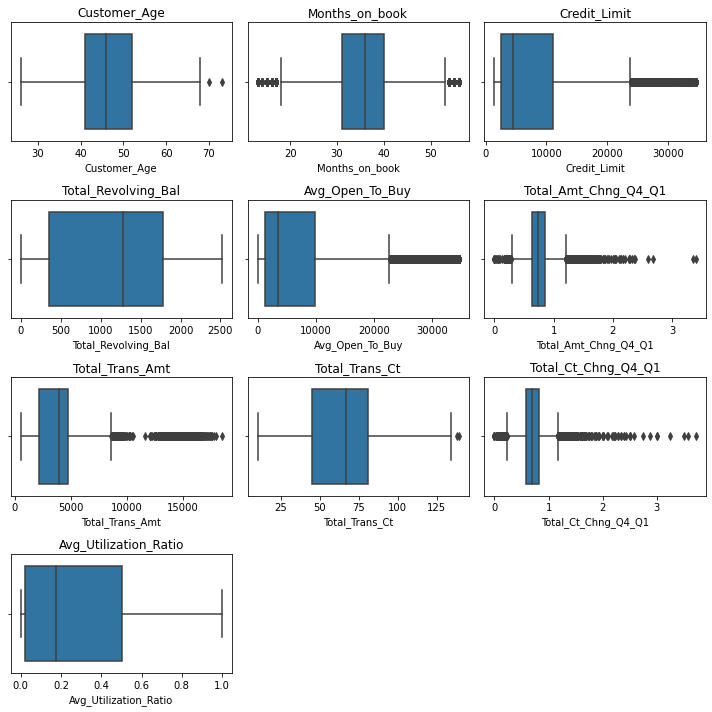

In [475]:
# Boxplot to check outliers in X_train
cols = data[['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,3,i+1)
                     sns.boxplot(data[variable]) # Plot BoxPlot
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [513]:
# Customer_Age Outlier Treatment
data['Customer_Age'].replace(data[data['Customer_Age']>65]['Customer_Age'].values , np.nan, inplace = True)

# Total_Trans_Amt Outlier Treatment
data['Total_Trans_Amt'].replace(data[data['Total_Trans_Amt']>16990]['Total_Trans_Amt'].values , np.nan, inplace = True)

# Total_Amt_Chng_Q4_Q1 Outlier Treatment
data['Total_Amt_Chng_Q4_Q1'].replace(data[data['Total_Amt_Chng_Q4_Q1']>2.5]['Total_Amt_Chng_Q4_Q1'].values , np.nan, inplace = True)

# Total_Trans_Ct Outlier Treatment
data['Total_Trans_Ct'].replace(data[data['Total_Trans_Ct']>129]['Total_Trans_Ct'].values , np.nan, inplace = True)

# Total_Ct_Chng_Q4_Q1 Outlier Treatment
data['Total_Ct_Chng_Q4_Q1'].replace(data[data['Total_Ct_Chng_Q4_Q1']>2]['Total_Ct_Chng_Q4_Q1'].values , np.nan, inplace = True)

### 2.1 Data Preparation

In [514]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144.0,42.0,1.625,0.061
1,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291.0,33.0,NaN,0.105
2,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,NaN,1887.0,20.0,NaN,0.000
3,Existing Customer,40.0,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171.0,20.0,NaN,0.760
4,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816.0,28.0,NaN,0.000


In [515]:
# Label Encode categorical variables
attrition = {'Existing Customer':0, 'Attrited Customer':1}
data['Attrition_Flag']=data['Attrition_Flag'].map(attrition)

marital_status = {'Married':1,'Single':2, 'Divorced':3}
data['Marital_Status']=data['Marital_Status'].map(marital_status)

gender = {'M':0, 'F':1}
data['Gender']=data['Gender'].map(gender)

education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
data['Education_Level']=data['Education_Level'].map(education)

income = {'Less than $40K':1,'$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
data['Income_Category']=data['Income_Category'].map(income)

card = {'Blue':1,'Silver':2, 'Gold':3, 'Platinum':4}
data['Card_Category']=data['Card_Category'].map(card)

### 2.2 Split data into dependent and independent variables

In [516]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45.0,0,3,2.0,1.0,3.0,1,39,5,1,3,12691.0,777,11914.0,1.335,1144.0,42.0,1.625,0.061
1,0,49.0,1,5,3.0,2.0,1.0,1,44,6,1,2,8256.0,864,7392.0,1.541,1291.0,33.0,NaN,0.105
2,0,51.0,0,3,3.0,1.0,4.0,1,36,4,1,0,3418.0,0,3418.0,NaN,1887.0,20.0,NaN,0.000
3,0,40.0,1,4,2.0,NaN,1.0,1,34,3,4,1,3313.0,2517,796.0,1.405,1171.0,20.0,NaN,0.760
4,0,40.0,0,3,1.0,1.0,3.0,1,21,5,1,0,4716.0,0,4716.0,2.175,816.0,28.0,NaN,0.000


In [517]:
#Defining X and y variables
new_X = data.drop(['Attrition_Flag'], axis=1) # Independent Variables
new_y = data[['Attrition_Flag']] # Dependent Variables



print(new_X.head())
print(new_y.head())

   Customer_Age Gender Dependent_count  Education_Level  Marital_Status  \
0          45.0      0               3              2.0             1.0   
1          49.0      1               5              3.0             2.0   
2          51.0      0               3              3.0             1.0   
3          40.0      1               4              2.0             NaN   
4          40.0      0               3              1.0             1.0   

   Income_Category Card_Category  Months_on_book Total_Relationship_Count  \
0              3.0             1              39                        5   
1              1.0             1              44                        6   
2              4.0             1              36                        4   
3              1.0             1              34                        3   
4              3.0             1              21                        5   

  Months_Inactive_12_mon Contacts_Count_12_mon  Credit_Limit  \
0                     

In [518]:
# Print shape of independent and dependent variable
print(new_X.shape)
print(new_y.shape)

(10127, 19)
(10127, 1)


In [519]:
# Convert dependent variable to integer
categories = ['Attrition_Flag']
new_y = new_y.apply(lambda col: col.astype('int') if col.name in categories else col)

### 2.3 Split Data into Train, Validation and Test 

In [520]:
# Get validation set
X = new_X.sample(frac=0.9, random_state=42)
y = new_y.sample(frac=0.9, random_state=42)
X_unseen = new_X.drop(X.index)
y_unseen = new_y.drop(y.index)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_unseen.reset_index(drop=True, inplace=True)
y_unseen.reset_index(drop=True, inplace=True)

print('X: ' + str(X.shape))
print('y: ' + str(y.shape))
print('X_unseen: ' + str(X_unseen.shape))
print('y_unseen: ' + str(y_unseen.shape))

X: (9114, 19)
y: (9114, 1)
X_unseen: (1013, 19)
y_unseen: (1013, 1)


In [521]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(X_train.shape, X_test.shape, X_unseen.shape)

(6379, 19) (2735, 19) (1013, 19)


### 2.4 Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [522]:
#Checking that no column has missing values in train validation or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())
print('-'*30)
print(X_unseen.isna().sum())

Customer_Age                  6
Gender                        0
Dependent_count               0
Education_Level             978
Marital_Status              471
Income_Category             689
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          3
Total_Trans_Amt               7
Total_Trans_Ct               11
Total_Ct_Chng_Q4_Q1          17
Avg_Utilization_Ratio         0
dtype: int64
------------------------------
Customer_Age                  4
Gender                        0
Dependent_count               0
Education_Level             404
Marital_Status              215
Income_Category             295
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon       

In [523]:
# Initialize KNN model
imputer = KNNImputer(n_neighbors=5)

In [524]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

#Transform the unseen data 
X_unseen=pd.DataFrame(imputer.transform(X_unseen),columns=X_unseen.columns)

In [525]:
#Checking that no column has missing values in train validation or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())
print('-'*30)
print(X_unseen.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.
* Let's inverse map the encoded values.

In [526]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')
    X_unseen[y] = np.round(X_unseen[y]).map(inv_dict).astype('category')

In [527]:
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(gender,'Gender')
inverse_mapping(education,'Education_Level')
inverse_mapping(income,'Income_Category')
inverse_mapping(card,'Card_Category')

In [528]:
# Check to see if inverted on train
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3359
M    3020
Name: Gender, dtype: int64
******************************
Graduate         2536
High School      1534
Uneducated        937
College           767
Post-Graduate     326
Doctorate         279
Name: Education_Level, dtype: int64
******************************
Married     3169
Single      2732
Divorced     478
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2378
$40K - $60K       1330
$80K - $120K      1100
$60K - $80K       1085
$120K +            486
Name: Income_Category, dtype: int64
******************************
Blue        5950
Silver       353
Gold          64
Platinum      12
Name: Card_Category, dtype: int64
******************************


In [529]:
# Check to see if inverted on test
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_test[i].value_counts())
    print('*'*30)

F    1444
M    1291
Name: Gender, dtype: int64
******************************
Graduate         1099
High School       656
Uneducated        418
College           288
Post-Graduate     148
Doctorate         126
Name: Education_Level, dtype: int64
******************************
Married     1332
Single      1208
Divorced     195
Name: Marital_Status, dtype: int64
******************************
Less than $40K    984
$40K - $60K       640
$80K - $120K      460
$60K - $80K       459
$120K +           192
Name: Income_Category, dtype: int64
******************************
Blue        2537
Silver       149
Gold          42
Platinum       7
Name: Card_Category, dtype: int64
******************************


In [530]:
# Check to see if inverted on unseen data
cols = X_unseen.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_unseen[i].value_counts())
    print('*'*30)

F    555
M    458
Name: Gender, dtype: int64
******************************
Graduate         394
High School      252
Uneducated       144
College          125
Post-Graduate     52
Doctorate         46
Name: Education_Level, dtype: int64
******************************
Married     481
Single      457
Divorced     75
Name: Marital_Status, dtype: int64
******************************
Less than $40K    387
$40K - $60K       214
$60K - $80K       186
$80K - $120K      158
$120K +            68
Name: Income_Category, dtype: int64
******************************
Blue        949
Silver       53
Gold         10
Platinum      1
Name: Card_Category, dtype: int64
******************************


### 2.5 Encoding Categorical Columns

In [531]:
# Get dummies for Nomminal features
X_train = pd.get_dummies(X_train, columns=['Gender', 'Education_Level', 'Marital_Status', 
                               'Income_Category','Card_Category'], drop_first=True)

X_test = pd.get_dummies(X_test, columns=['Gender', 'Education_Level', 'Marital_Status', 
                               'Income_Category','Card_Category'], drop_first=True)

X_unseen = pd.get_dummies(X_unseen, columns=['Gender', 'Education_Level', 'Marital_Status', 
                               'Income_Category','Card_Category'], drop_first=True)

print(X_train.shape, X_test.shape, X_unseen.shape)

(6379, 29) (2735, 29) (1013, 29)


### 2.6 Model Building 

We'll fit different models on the train data and observe their performance. A confusion matrix will be used to evaluate our model

***Positive Class (1)***: Customer attrited.
***Negative Class (0)***: Customer is existing.



- True Positive: Model correctly predicted that a customer will attrite. 

- False Positive:  Model falsely predicted that a customer will attrite leading to waste in resources in trying to stop these customers from attriting

- True Negative: Model correctly predicted that a customer is existing.

- False Negative: Model falsely predicted that a customer is existing resulting in the bank being unable to anticipate potential churn and stop it from happening leading to loss of customers and potential revenue.

The confusion matrix allows us test how good our model is on data that the model hasn't seen before.
In deciding which metric to use to evaluate our models, we have to decide which classification has the worst cost implication for the bank. That is, which situation would the bank want to avoid at all cost.

The classification with the worst cost implication is the False Negative classification. This is because by falsely predicting that a customer will remain with the bank, the customer will be lost without much being done to stop this from happening.

As we care about the False Negative, we would be using Recall to evaluate the accuracy of our models. 

- ***Recall***: Recall attempts to answer the question "What proportion of actual positives was identified correctly? 
Formula- TP/(TP + FN)

**We will start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validator` provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [532]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [533]:
#  Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Existing","Actual - Attrited"]],
                  columns = [i for i in ['Predicted - Existing','Predicted - Attrited']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression 

In [613]:
#Initialize model using pipeline
pipe_lr = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

#Fit on train data
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

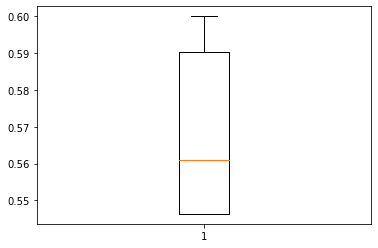

In [614]:
#Evaluate the model performance by using KFold and cross_val_score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
lr_cv_result=cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(lr_cv_result)
plt.show()

* Performance on training set varies between 0.54 to 0.6 recall with the average recall being 0.57

Accuracy on training set :  0.9034331399905942
Accuracy on test set :  0.9042047531992687
Recall on training set :  0.5804878048780487
Recall on test set :  0.5763097949886105
Precision on training set :  0.7618437900128041
Precision on test set :  0.7689969604863222


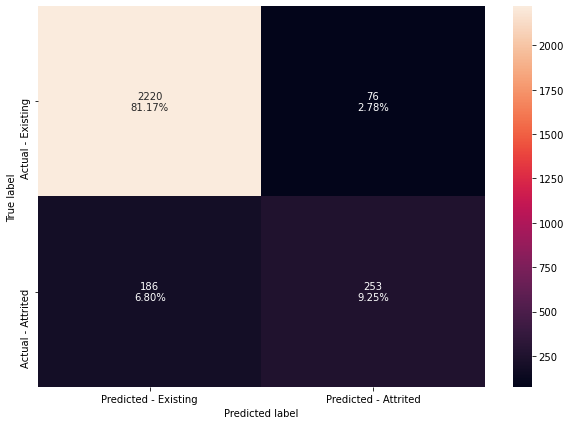

In [617]:
#Calculating different metrics
get_metrics_score(pipe_lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(pipe_lr,y_test)

### Observation

- This model has generalized well on training and test set however, it is underfitting on recall. This may be as a result of us having an imbalanced dataset. We would need to treat the imbalance using SMOTE for undersampling and oversampling

In [618]:
# Ovrsample data to balance classes
print("Before UpSampling, counts of label 'Attrited': {}".format(sum(y_train['Attrition_Flag']==1)))
print("Before UpSampling, counts of label 'Existing': {} \n".format(sum(y_train['Attrition_Flag']==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Attrited': {}".format(sum(y_train_over['Attrition_Flag']==1)))
print("After UpSampling, counts of label 'Existing': {} \n".format(sum(y_train_over['Attrition_Flag']==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Attrited': 1025
Before UpSampling, counts of label 'Existing': 5354 

After UpSampling, counts of label 'Attrited': 5354
After UpSampling, counts of label 'Existing': 5354 

After UpSampling, the shape of train_X: (10708, 29)
After UpSampling, the shape of train_y: (10708, 1) 



### Logistic Regression on oversampled data

In [619]:
#Initialize Model
pipe_lr_over = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

#Fit on train data
pipe_lr_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

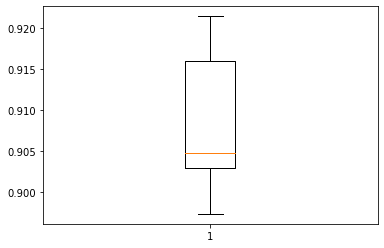

In [620]:
#Evaluate the model performance by using KFold and cross_val_score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=pipe_lr_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance on training set varies between 0.89 to 0.92 recall with the average recall being 0.91

Accuracy on training set :  0.9161374673141577
Accuracy on test set :  0.8873857404021938
Recall on training set :  0.9094135225999253
Recall on test set :  0.6651480637813212
Precision on training set :  0.9218099204846649
Precision on test set :  0.6445916114790287


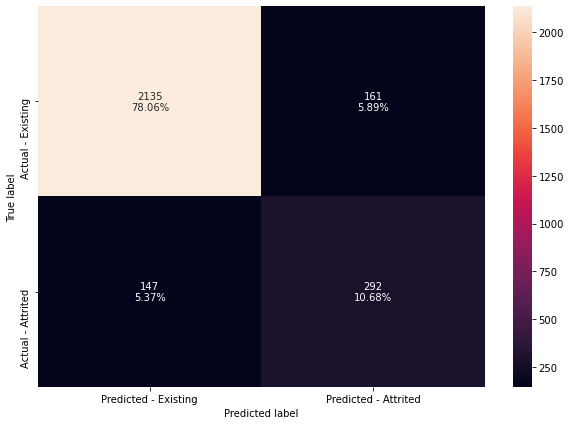

In [623]:
#Calculating different metrics
get_metrics_score(pipe_lr_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(pipe_lr_over,y_test)

### Observation

- This model ad an improved performance on recall however, the model did not generalize well on test with an overfit recall

-  We would try regularization to see if overfitting can be reduced

- We would try undersampling to see if we get a better performance

### Regularization on Oversampled data

In [633]:
# Choose the type of classifier. 
pipe_lr_over_reg = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

# Grid of parameters to choose from
parameters = {'logisticregression__C': np.arange(0.005,0.1,0.01),
              'logisticregression__solver' : ['liblinear','newton-cg','lbfgs','sag','saga'],
              'logisticregression__penalty': ['l1','l2']
             }

# Run the grid search
grid_obj = GridSearchCV(pipe_lr_over_reg, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
pipe_lr_over_reg = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
pipe_lr_over_reg.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.075, penalty='l1', random_state=1,
                                    solver='saga'))])

Accuracy on training set :  0.9164176316772507
Accuracy on test set :  0.8884826325411335
Recall on training set :  0.9097870750840493
Recall on test set :  0.6674259681093394
Precision on training set :  0.9220140071928828
Precision on test set :  0.6482300884955752


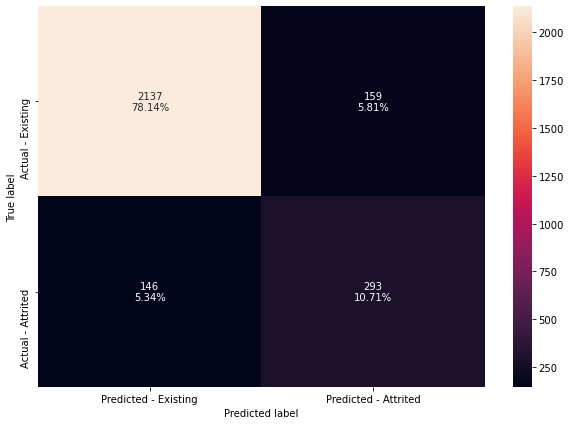

In [634]:
#Calculating different metrics
get_metrics_score(pipe_lr_over_reg,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(pipe_lr_over_reg,y_test)

### Observation

- After regularization, the models recall improved slightly however, there is still overfitting

### Undersampling train data using SMOTE

In [635]:
rus = RandomUnderSampler(random_state = 1) # Undersample dependent variable
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [636]:
#Undersample to balance classes
print("Before Under Sampling, counts of label 'Attrited': {}".format(sum(y_train['Attrition_Flag']==1)))
print("Before Under Sampling, counts of label 'Existing': {} \n".format(sum(y_train['Attrition_Flag']==0)))

print("After Under Sampling, counts of label 'Attrited': {}".format(sum(y_train_un['Attrition_Flag']==1)))
print("After Under Sampling, counts of label 'Existing': {} \n".format(sum(y_train_un['Attrition_Flag']==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited': 1025
Before Under Sampling, counts of label 'Existing': 5354 

After Under Sampling, counts of label 'Attrited': 1025
After Under Sampling, counts of label 'Existing': 1025 

After Under Sampling, the shape of train_X: (2050, 29)
After Under Sampling, the shape of train_y: (2050, 1) 



### Logistic Regression on undersampled data

In [637]:
# Initialize model using pipeline
pipe_lr_under = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

# Training the basic logistic regression model with training set 
pipe_lr_under.fit(X_train_un,y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=1))])

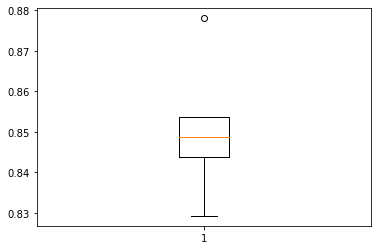

In [638]:
#Evaluate the model performance by using KFold and cross_val_score
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=pipe_lr_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance on training set varies between 0.83 to 0.88 recall with the average recall being 0.85

Accuracy on training set :  0.8595121951219512
Accuracy on test set :  0.8416819012797075
Recall on training set :  0.8624390243902439
Recall on test set :  0.835990888382688
Precision on training set :  0.8574199806013579
Precision on test set :  0.5041208791208791


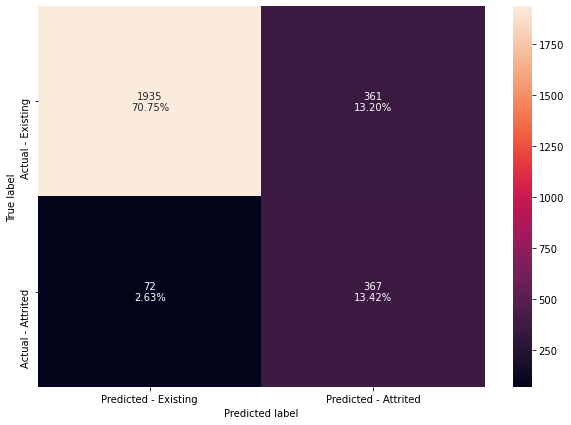

In [641]:
#Calculating different metrics
get_metrics_score(pipe_lr_under,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(pipe_lr_under,y_test)

### Observation

- This model generalized well on training and test set after undersampling. Our recall after undersampling on test was better than our recall after oversampling on test

In [643]:
# Choose the type of classifier. 
pipe_lr_under = make_pipeline( StandardScaler(), (LogisticRegression(random_state=1)))

# Grid of parameters to choose from
parameters = {'logisticregression__C': np.arange(0.01,0.05,0.01),
              'logisticregression__solver' : ['liblinear','newton-cg','lbfgs','sag','saga'],
              'logisticregression__penalty': ['l1','l2']
             }

# Run the grid search
grid_obj = GridSearchCV(pipe_lr_under, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
pipe_lr_under = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
pipe_lr_under.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.04, penalty='l1', random_state=1,
                                    solver='liblinear'))])

Accuracy on training set :  0.8497560975609756
Accuracy on test set :  0.8394881170018281
Recall on training set :  0.8526829268292683
Recall on test set :  0.8382687927107062
Precision on training set :  0.8477206595538312
Precision on test set :  0.5


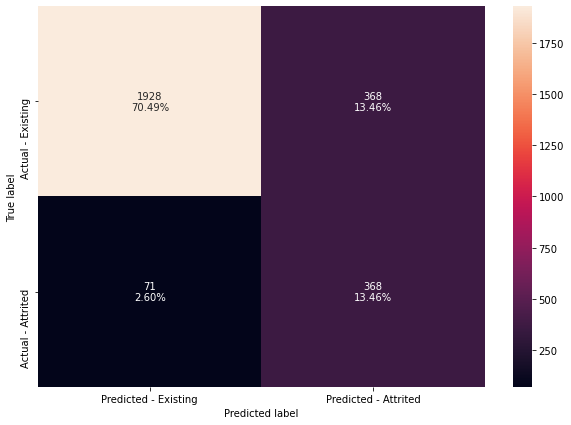

In [644]:
#Calculating different metrics
get_metrics_score(pipe_lr_under,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(pipe_lr_under,y_test)

### Observation

- After reglurazing on undersampled data, our recall improved, generalized well and also performed better than our regularized oversampled model

- This model is our best model so far

### Finding the coefficients

In [646]:
# Find the coefficients of logistic regression model
log_odds = pipe_lr_under.named_steps['logisticregression'].coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef']).T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
coef,0.0,0.070283,0.0,-0.42435,0.466245,0.429993,0.0,-0.566622,0.0,-0.014105,...,0.0,-0.085324,0.0,0.0,-0.019182,0.0,0.0,0.0,0.0,0.0


###  Converting coefficients to odds

In [647]:
# Convert coefficient to odds
odds = np.exp(np.abs(log_reg_under.coef_[0]))-1
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train_un.columns, columns=['Change in odds']).T

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Change in odds,0.034398,0.466174,0.025518,0.23047,0.643251,0.848052,0.000266,0.000523,0.000257,0.010224,...,0.006897,0.03737,0.099151,0.052236,0.028072,0.007351,0.066064,0.00621,0.000022,0.00452


**Lets build a Decision Tree, Bagging Classifier, Random Forest, Adaboost, Gradient Boost, XGBoost to see if we get better recall performance. We will do this by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV. We will also train our model on both our undersampled and oversampled data and pick the one with the better performance**

In [720]:
over_models = []  # Empty list to store all the models using oversampled data 
un_models = []  # Empty list to store all the models using undersampled data 

# Appending pipelines for each model into the list
over_models.append(
    (
        "over_BG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)

un_models.append(
    (
        "un_BG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
over_models.append(
    (
        "over_RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
un_models.append(
    (
        "un_RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
over_models.append(
    (
        "over_GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
un_models.append(
    (
        "un_GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
over_models.append(
    (
        "over_ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
un_models.append(
    (
        "un_ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
over_models.append(
    (
        "over_XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
un_models.append(
    (
        "un_XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
over_models.append(
    (
        "over_DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
un_models.append(
    (
        "un_DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

over_results = []  # Empty list to store all model's CV scores for oversampled data
un_results = []  # Empty list to store all model's CV scores for undersampled data
over_names = []  # Empty list to store name of the models for oversampled data
un_names = []  # Empty list to store name of the models for undersampled data

# loop through all models to get the mean cross validated score
for name, model in over_models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    over_cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    over_results.append(over_cv_result)
    over_names.append(name)
    print("{}: {}".format(name, over_cv_result.mean() * 100))

print('-'*30)
    

# loop through all models to get the mean cross validated score
for name, model in un_models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    un_cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    un_results.append(un_cv_result)
    un_names.append(name)
    print("{}: {}".format(name, un_cv_result.mean() * 100))

over_BG: 96.61928322730961
over_RF: 97.9642399015681
over_GBM: 97.66540136303743
over_ADB: 96.6195799191951
over_XGB: 98.24435194638603
over_DTREE: 95.01308062165675
------------------------------
un_BG: 90.34146341463416
un_RF: 93.07317073170731
un_GBM: 94.53658536585365
un_ADB: 93.36585365853658
un_XGB: 94.53658536585365
un_DTREE: 89.46341463414636


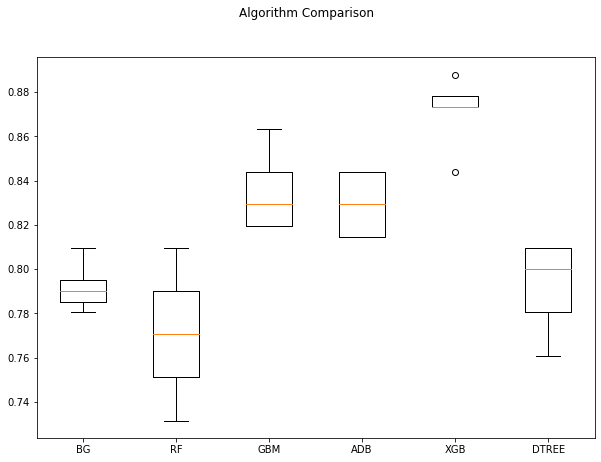

In [663]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(over_results)
ax.set_xticklabels(over_names)

plt.show()

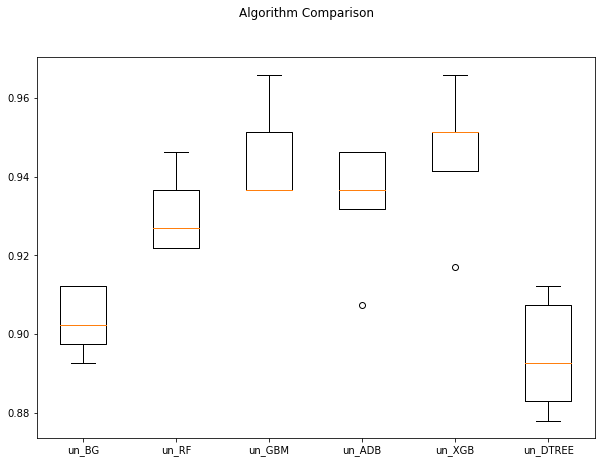

In [721]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(un_results)
ax.set_xticklabels(un_names)

plt.show()

- With our oversampled data, our XGBoost model is giving the best recall on train for recall followed by Random Forest and then Gradient Boost

- With our undersampled data, our XGBoost model is giving the best recall on train for recall followed by Gradient Boost and then AdaBoost

- We will tune our 3 best models for each and see if the performance improves. 

## Hyperparameter Tuning

**We will use pipelines with StandardScaler and all 3 models and then tune the models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.**

In [665]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [666]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Existing","Actual - Attrited"]],
                  columns = [i for i in ['Predicted - Existing','Predicted - Attrited']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### AdaBoost 

### GridSearchCV (Undersampled)

In [715]:
%%time
# Creating pipeline
pipe_ada_grid_un = make_pipeline(StandardScaler(), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', 
                                                                    max_features=0.9,min_samples_leaf= 40, max_depth= 2, 
                                                                    random_state=1)))

# Parameter grid to pass in GridSearchCV
param_grid = {'adaboostclassifier__n_estimators': range(100, 200, 50),
              'adaboostclassifier__learning_rate': [0.1, 0.01, 0.2, 0.05, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe_ada_grid_un, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters with undersampled train data in GridSeachCV
grid_cv= grid_cv.fit(X_train_un, y_train_un)
                              
# Set the clf to the best combination of parameters
pipe_ada_grid_un = grid_cv.best_estimator_

pipe_ada_grid_un

Wall time: 1min 35s


In [975]:
# Creating new pipeline with best parameters
abc_tuned_grid_un = make_pipeline(
    StandardScaler(),AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, 
                                                                              max_features=0.9,
                                                                              min_samples_leaf=40,
                                                                              random_state=1),
                                        learning_rate=0.1, n_estimators=150))

# Fit the model on undersampled training data
abc_tuned_grid_un.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          max_features=0.9,
                                                                          min_samples_leaf=40,
                                                                          random_state=1),
                                    learning_rate=0.1, n_estimators=150))])

Accuracy on training set :  0.9668292682926829
Accuracy on test set :  0.9473491773308957
Recall on training set :  0.9717073170731707
Recall on test set :  0.958997722095672
Precision on training set :  0.9623188405797102
Precision on test set :  0.7696526508226691


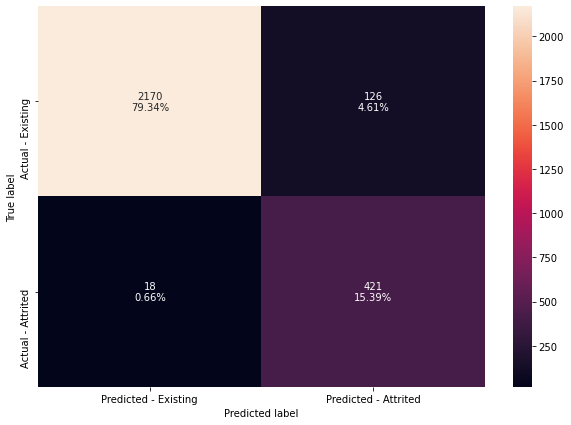

In [976]:
#Calculating different metrics
get_metrics_score(abc_tuned_grid_un,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(abc_tuned_grid_un,y_test)

### AdaBoost RandomizedSearchCV (Undersampled)

In [995]:
%%time

# Creating pipeline
pipe_ada_rand_un = make_pipeline(StandardScaler(), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', 
                                                                    max_features='sqrt',min_samples_leaf= 40, max_depth= 4, 
                                                                    random_state=1)))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(100, 200, 50),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_rand_cv = RandomizedSearchCV(estimator=pipe_ada_rand_un, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
ada_rand_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
pipe_ada_rand_un = ada_rand_cv.best_estimator_

pipe_ada_rand_un

Wall time: 36.9 s
Parser   : 1.02 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                          max_features='sqrt',
                                                                          min_samples_leaf=40,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=100))])

In [1010]:
# Creating new pipeline with best parameters
abc_tuned_rand_un = make_pipeline(
    StandardScaler(),AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                          max_features='sqrt',
                                                                          min_samples_leaf=35,
                                                                          random_state=1),
                                        learning_rate=0.1, n_estimators=100))

# Fit the model on training data
abc_tuned_rand_un.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                          max_features='sqrt',
                                                                          min_samples_leaf=35,
                                                                          random_state=1),
                                    learning_rate=0.1, n_estimators=100))])

Accuracy on training set :  0.9921951219512195
Accuracy on test set :  0.9451553930530164
Recall on training set :  0.9921951219512195
Recall on test set :  0.9567198177676538
Precision on training set :  0.9921951219512195
Precision on test set :  0.7622504537205081


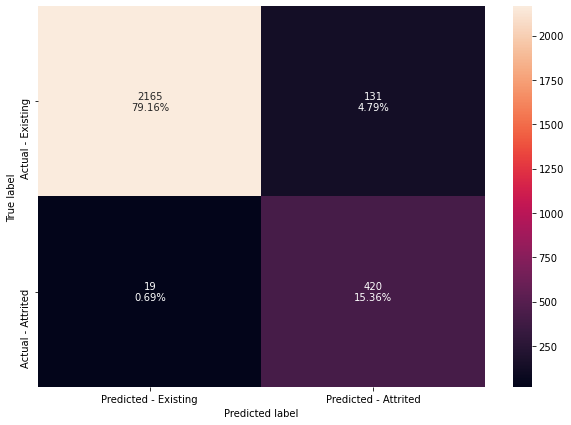

In [1011]:
#Calculating different metrics
get_metrics_score(abc_tuned_rand_un,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(abc_tuned_rand_un,y_test)

### Plotting the feature importance of each variable

In [1012]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(abc_tuned_grid_un.named_steps['adaboostclassifier'].feature_importances_, columns = ["Importance"], index = X_train_un.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
Total_Trans_Amt                   0.219003
Total_Trans_Ct                    0.185724
Total_Revolving_Bal               0.120312
Total_Amt_Chng_Q4_Q1              0.093585
Total_Ct_Chng_Q4_Q1               0.071940
Months_Inactive_12_mon            0.058236
Total_Relationship_Count          0.049279
Contacts_Count_12_mon             0.044846
Customer_Age                      0.042283
Credit_Limit                      0.037200
Months_on_book                    0.026566
Avg_Open_To_Buy                   0.024095
Dependent_count                   0.012019
Avg_Utilization_Ratio             0.010572
Education_Level_High School       0.002824
Gender_M                          0.001515
Education_Level_Graduate          0.000000
Education_Level_Doctorate         0.000000
Education_Level_Post-Graduate     0.000000
Education_Level_Uneducated        0.000000
Marital_Status_Married            0.000000
Marital_Status_Single             0.000000
Income_Cate

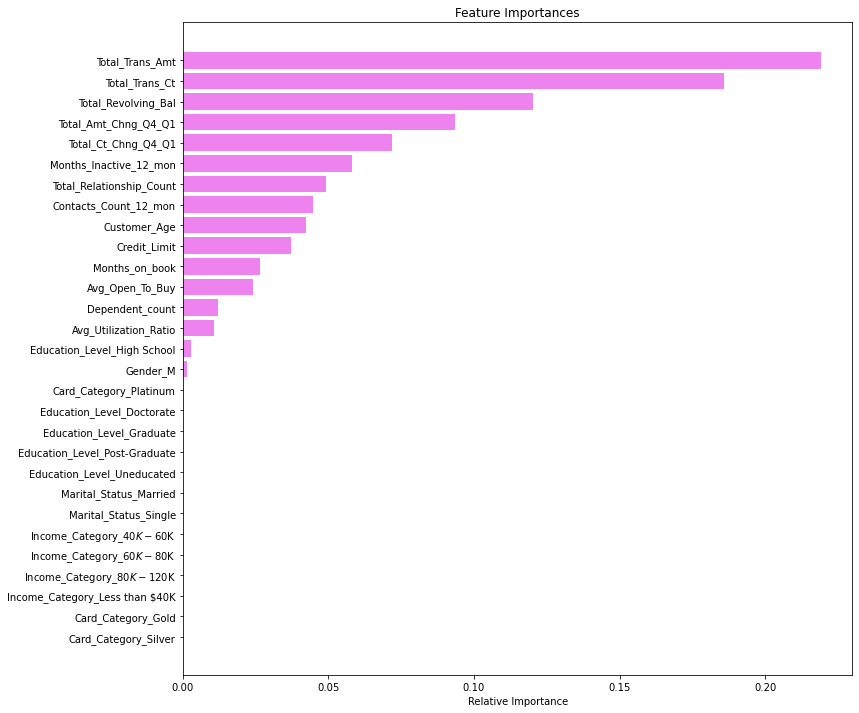

In [1013]:
# Visualize important features to our model
importances = abc_tuned_grid_un.named_steps['adaboostclassifier'].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [X_train_un.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation

- Our AdaBoost model tuned with GridSearch gave us the best result on recall. The model generalized well as there is no overfitting.

- The model predicted that the top 6 most important features in predicting if a credit card customer will churn is Total_Trans_Amt, Total_Trans_Ct, Total_Revolving_Bal, Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1 and Months_Inactive_12_mon

### Random Forest

### Random Forest GridSearchCV

In [1072]:
%%time
# Creating pipeline
pipe_rf_grid_over = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'randomforestclassifier__max_depth':[12,13,14],
              'randomforestclassifier__max_features': ['sqrt'],
              'randomforestclassifier__n_estimators': range(25,30,1),
              'randomforestclassifier__max_samples': [0.9],
              'randomforestclassifier__min_samples_leaf':[4,5,6]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(pipe_rf_grid_over, param_grid, scoring=scorer,cv=5)

# Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
pipe_rf_grid_over = grid_cv.best_estimator_

pipe_rf_grid_over

Wall time: 1min 59s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=13, max_features='sqrt',
                                        max_samples=0.9, min_samples_leaf=6,
                                        n_estimators=26, random_state=1))])

In [1081]:
# Creating new pipeline with best parameters
rf_tuned_grid_over = make_pipeline(
    StandardScaler(),RandomForestClassifier(max_depth=13, max_features='sqrt',
                                        max_samples=0.9, min_samples_leaf=5,
                                        n_estimators=26, random_state=1))

# Fit the model on training data
rf_tuned_grid_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=13, max_features='sqrt',
                                        max_samples=0.9, min_samples_leaf=5,
                                        n_estimators=26, random_state=1))])

Accuracy on training set :  0.9872058274187523
Accuracy on test set :  0.9462522851919561
Recall on training set :  0.9910347403810236
Recall on test set :  0.8451025056947609
Precision on training set :  0.9835032437442076
Precision on test set :  0.8244444444444444


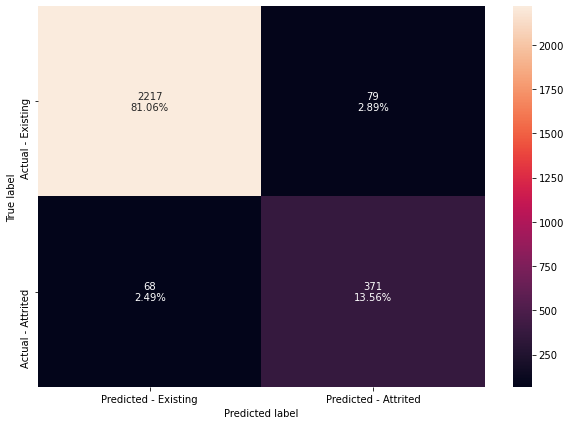

In [1082]:
#Calculating different metrics
get_metrics_score(rf_tuned_grid_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(rf_tuned_grid_over,y_test)

### Random Forest Randomized Search(Oversampled)

In [1085]:
%%time

# Creating pipeline
pipe_rf_rand_over = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {'randomforestclassifier__max_depth':[12,13,14],
              'randomforestclassifier__max_features': ['sqrt'],
              'randomforestclassifier__n_estimators': range(20,25,1),
              'randomforestclassifier__max_samples': [0.9],
              'randomforestclassifier__min_samples_leaf':[5,6,7]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_rand_cv = RandomizedSearchCV(estimator=pipe_rf_rand_over, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
rf_rand_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
pipe_rf_rand_over = rf_rand_cv.best_estimator_

pipe_rf_rand_over

Wall time: 1min 40s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=13, max_features='sqrt',
                                        max_samples=0.9, min_samples_leaf=6,
                                        n_estimators=23, random_state=1))])

In [1086]:
# Creating new pipeline with best parameters
rf_tuned_rand_over = make_pipeline(
    StandardScaler(),RandomForestClassifier(max_depth=13, max_features='sqrt',
                                        max_samples=0.9, min_samples_leaf=6,
                                        n_estimators=23, random_state=1))

# Fit the model on training data
rf_tuned_rand_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=13, max_features='sqrt',
                                        max_samples=0.9, min_samples_leaf=6,
                                        n_estimators=23, random_state=1))])

Accuracy on training set :  0.9846843481509152
Accuracy on test set :  0.946617915904936
Recall on training set :  0.9880463205080314
Recall on test set :  0.8473804100227791
Precision on training set :  0.9814471243042672
Precision on test set :  0.8248337028824834


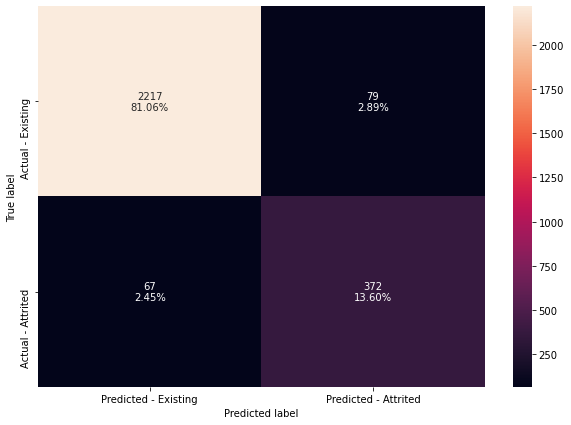

In [1087]:
#Calculating different metrics
get_metrics_score(rf_tuned_rand_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(rf_tuned_rand_over,y_test)

### Plotting the feature importance of each variable

In [1088]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_tuned_rand_over.named_steps['randomforestclassifier'].feature_importances_, columns = ["Importance"], index = X_train_over.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
Total_Trans_Ct                    0.206558
Total_Trans_Amt                   0.193477
Total_Revolving_Bal               0.139725
Total_Ct_Chng_Q4_Q1               0.074544
Total_Relationship_Count          0.057299
Months_Inactive_12_mon            0.049914
Avg_Utilization_Ratio             0.044589
Contacts_Count_12_mon             0.035393
Total_Amt_Chng_Q4_Q1              0.032390
Marital_Status_Married            0.026419
Credit_Limit                      0.021905
Avg_Open_To_Buy                   0.016547
Customer_Age                      0.016540
Gender_M                          0.014904
Marital_Status_Single             0.014447
Dependent_count                   0.010720
Months_on_book                    0.010147
Income_Category_$60K - $80K       0.009378
Education_Level_High School       0.008123
Income_Category_Less than $40K    0.005355
Education_Level_Graduate          0.003927
Income_Category_$40K - $60K       0.002978
Income_Cate

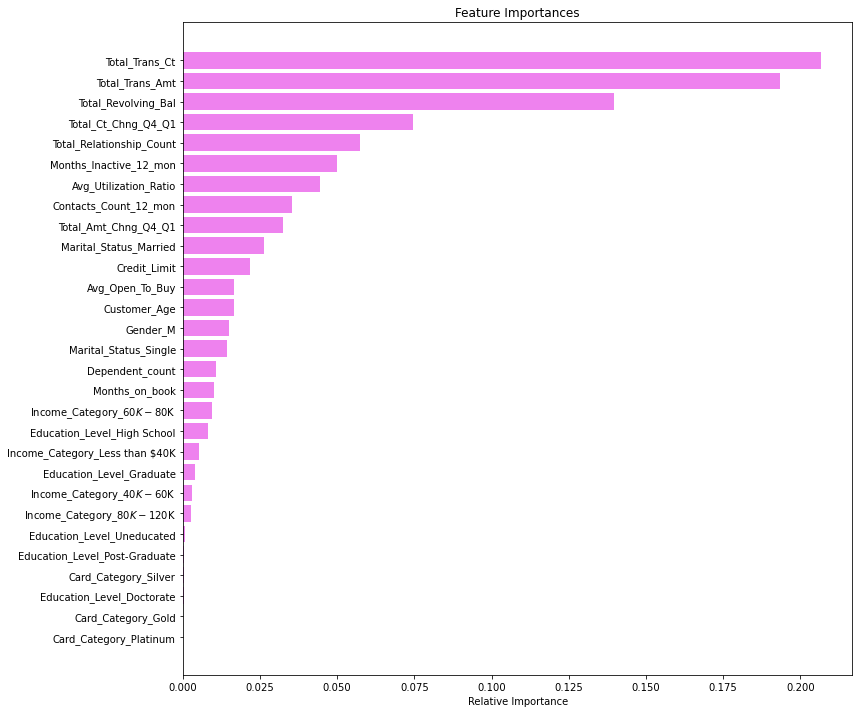

In [1089]:
# Visualize important features to our model
importances = rf_tuned_rand_over.named_steps['randomforestclassifier'].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [X_train_over.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation

- Our Random Forest model tuned with RandomizedSearch gave us the best result on recall. The model however did not generalize well as their is overfitting on recall. Part of the reason why this would have occured is the creation of sythetic data when oversampling our data to deal with the imbalanced classes

- The model predicted that the top 3 most important features in predicting if a credit card customer will churn is Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal

### Gradient Boost 

### Gradient Boost GridSearchCV (Oversampled)

In [790]:
%%time
# Creating pipeline
pipe_gb_grid_over = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'gradientboostingclassifier__n_estimators':[192,193,194],
              'gradientboostingclassifier__subsample':[0.7,0.8,0.9],
              'gradientboostingclassifier__max_features':['sqrt'],
              'gradientboostingclassifier__max_depth':[19,20,21],
              'gradientboostingclassifier__learning_rate': [0.01],
              'gradientboostingclassifier__min_samples_leaf': [6,7,8],
              'gradientboostingclassifier__min_samples_split': [41,42,43]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(pipe_gb_grid_over, param_grid, scoring=scorer,cv=5)

# Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
pipe_gb_grid_over = grid_cv.best_estimator_

pipe_gb_grid_over

Wall time: 1min 10s
Compiler : 138 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=20,
                                            max_features='sqrt',
                                            min_samples_leaf=7,
                                            min_samples_split=42,
                                            n_estimators=193, random_state=1,
                                            subsample=0.8))])

In [791]:
# Creating new pipeline with best parameters
gb_tuned_grid_over = make_pipeline(
    StandardScaler(),GradientBoostingClassifier(learning_rate=0.01, max_depth=20,
                                            max_features='sqrt',
                                            min_samples_leaf=7,
                                            min_samples_split=42,
                                            n_estimators=193, random_state=1,
                                            subsample=0.8))

# Fit the model on training data
gb_tuned_grid_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=20,
                                            max_features='sqrt',
                                            min_samples_leaf=7,
                                            min_samples_split=42,
                                            n_estimators=193, random_state=1,
                                            subsample=0.8))])

Accuracy on training set :  0.9940231602540157
Accuracy on test set :  0.9506398537477148
Recall on training set :  0.9960776989166978
Recall on test set :  0.8428246013667426
Precision on training set :  0.9920014880952381
Precision on test set :  0.8486238532110092


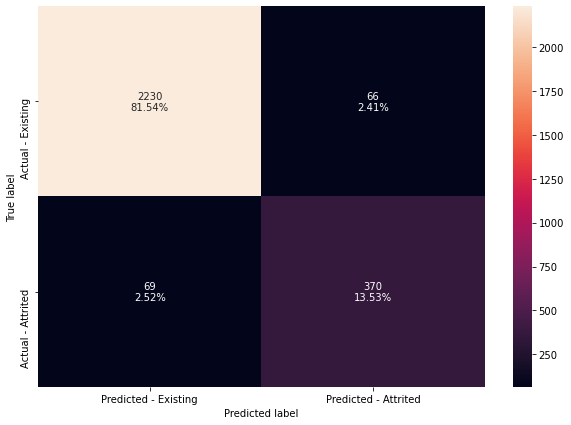

In [792]:
#Calculating different metrics
get_metrics_score(gb_tuned_grid_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(gb_tuned_grid_over,y_test)

### Gradient Boost  RandomizedSearchCV (Oversampled)

In [780]:
%%time

# Creating pipeline
pipe_gb_rand_over = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {'gradientboostingclassifier__n_estimators':[192,193,194],
              'gradientboostingclassifier__subsample':[0.8,0.9,1],
              'gradientboostingclassifier__max_features':['sqrt'],
              'gradientboostingclassifier__max_depth':[19,20,21],
              'gradientboostingclassifier__learning_rate': [0.01],
              'gradientboostingclassifier__min_samples_leaf': [6,7,8],
              'gradientboostingclassifier__min_samples_split': [41,42,43]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gb_rand_cv = RandomizedSearchCV(estimator=pipe_gb_rand_over, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gb_rand_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
pipe_gb_rand_over = gb_rand_cv.best_estimator_
                             
pipe_gb_rand_over

Wall time: 1min 16s
Compiler : 125 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=20,
                                            max_features='sqrt',
                                            min_samples_leaf=7,
                                            min_samples_split=42,
                                            n_estimators=193, random_state=1,
                                            subsample=0.9))])

In [781]:
# Creating new pipeline with best parameters
gb_tuned_rand_over = make_pipeline(
    StandardScaler(),GradientBoostingClassifier(learning_rate=0.01, max_depth=20,
                                            max_features='sqrt',
                                            min_samples_leaf=7,
                                            min_samples_split=42,
                                            n_estimators=193, random_state=1,
                                            subsample=0.9))

# Fit the model on training data
gb_tuned_rand_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=20,
                                            max_features='sqrt',
                                            min_samples_leaf=7,
                                            min_samples_split=42,
                                            n_estimators=193, random_state=1,
                                            subsample=0.9))])

Accuracy on training set :  0.9950504295853567
Accuracy on test set :  0.9524680073126143
Recall on training set :  0.9957041464325738
Recall on test set :  0.8473804100227791
Precision on training set :  0.9944040290990487
Precision on test set :  0.8551724137931035


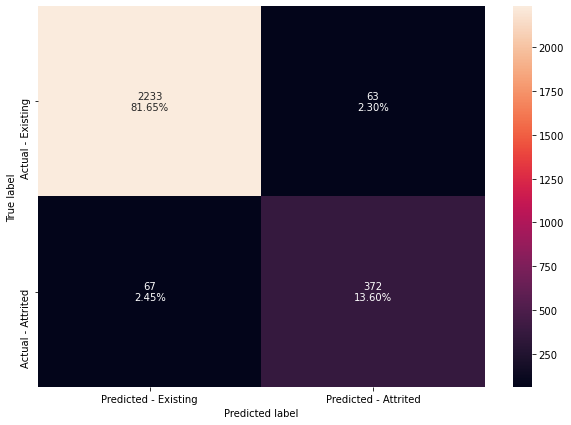

In [782]:
#Calculating different metrics
get_metrics_score(gb_tuned_rand_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(gb_tuned_rand_over,y_test)

### Gradient Boost GridSearchCV (Undersampled)

In [808]:
%%time
# Creating pipeline
pipe_gb_grid_un = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Grid of parameters to choose from
param_grid = {'gradientboostingclassifier__n_estimators':[187,188,189],
              'gradientboostingclassifier__subsample':[0.8,0.9,1],
              'gradientboostingclassifier__max_features':['sqrt'],
              'gradientboostingclassifier__max_depth':[18,19,20],
              'gradientboostingclassifier__learning_rate': [0.01],
              'gradientboostingclassifier__min_samples_leaf': [5,6,7],
              'gradientboostingclassifier__min_samples_split': [39,40,41]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(pipe_gb_grid_un, param_grid, scoring=scorer,cv=5)

# Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
pipe_gb_grid_un = grid_cv.best_estimator_

pipe_gb_grid_un

Wall time: 14.2 s
Parser   : 208 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=19,
                                            max_features='sqrt',
                                            min_samples_leaf=6,
                                            min_samples_split=40,
                                            n_estimators=188, random_state=1,
                                            subsample=0.9))])

In [809]:
# Creating new pipeline with best parameters
gb_tuned_grid_un = make_pipeline(
    StandardScaler(),GradientBoostingClassifier(learning_rate=0.01, max_depth=19,
                                            max_features='sqrt',
                                            min_samples_leaf=6,
                                            min_samples_split=40,
                                            n_estimators=188, random_state=1,
                                            subsample=0.9))

# Fit the model on training data
gb_tuned_grid_un.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=19,
                                            max_features='sqrt',
                                            min_samples_leaf=6,
                                            min_samples_split=40,
                                            n_estimators=188, random_state=1,
                                            subsample=0.9))])

Accuracy on training set :  0.9868292682926829
Accuracy on test set :  0.943327239488117
Recall on training set :  0.9941463414634146
Recall on test set :  0.9521640091116174
Precision on training set :  0.9798076923076923
Precision on test set :  0.7572463768115942


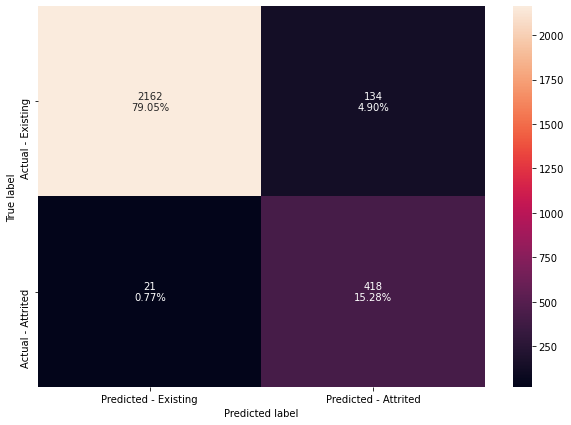

In [810]:
#Calculating different metrics
get_metrics_score(gb_tuned_grid_un,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(gb_tuned_grid_un,y_test)

### Gradient Boost  RandomizedSearchCV (Undersampled)

In [822]:
%%time

# Creating pipeline
pipe_gb_rand_un = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {'gradientboostingclassifier__n_estimators':[187,188,189],
              'gradientboostingclassifier__subsample':[0.8,0.9,1],
              'gradientboostingclassifier__max_features':['sqrt'],
              'gradientboostingclassifier__max_depth':[18,19,20],
              'gradientboostingclassifier__learning_rate': [0.01]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gb_rand_cv = RandomizedSearchCV(estimator=pipe_gb_rand_un, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gb_rand_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
pipe_gb_rand_un = gb_rand_cv.best_estimator_
                             
pipe_gb_rand_un

Wall time: 34min 31s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=18,
                                            max_features='sqrt',
                                            n_estimators=187, random_state=1,
                                            subsample=0.8))])

In [823]:
# Creating new pipeline with best parameters
gb_tuned_rand_un = make_pipeline(
    StandardScaler(),GradientBoostingClassifier(learning_rate=0.01, max_depth=18,
                                            max_features='sqrt',
                                            n_estimators=187, random_state=1,
                                            subsample=0.8))

# Fit the model on training data
gb_tuned_rand_un.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=18,
                                            max_features='sqrt',
                                            n_estimators=187, random_state=1,
                                            subsample=0.8))])

Accuracy on training set :  1.0
Accuracy on test set :  0.9484460694698355
Recall on training set :  1.0
Recall on test set :  0.9544419134396356
Precision on training set :  1.0
Precision on test set :  0.7759259259259259


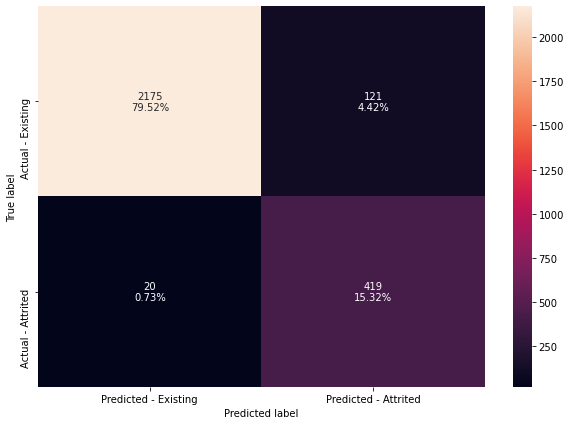

In [824]:
#Calculating different metrics
get_metrics_score(gb_tuned_rand_un,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(gb_tuned_rand_un,y_test)

### Plotting the feature importance of each variable

In [825]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(gb_tuned_rand_un.named_steps['gradientboostingclassifier'].feature_importances_, columns = ["Importance"], index = X_train_un.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
Total_Trans_Amt                   0.197625
Total_Trans_Ct                    0.192012
Total_Revolving_Bal               0.103495
Total_Ct_Chng_Q4_Q1               0.096264
Total_Amt_Chng_Q4_Q1              0.057819
Avg_Utilization_Ratio             0.057350
Total_Relationship_Count          0.042112
Avg_Open_To_Buy                   0.036171
Credit_Limit                      0.033624
Months_Inactive_12_mon            0.031562
Customer_Age                      0.031409
Contacts_Count_12_mon             0.027485
Months_on_book                    0.025237
Dependent_count                   0.014079
Gender_M                          0.009382
Marital_Status_Married            0.005393
Marital_Status_Single             0.004643
Income_Category_Less than $40K    0.004438
Education_Level_Graduate          0.004060
Income_Category_$60K - $80K       0.003683
Education_Level_High School       0.003560
Income_Category_$40K - $60K       0.003497
Income_Cate

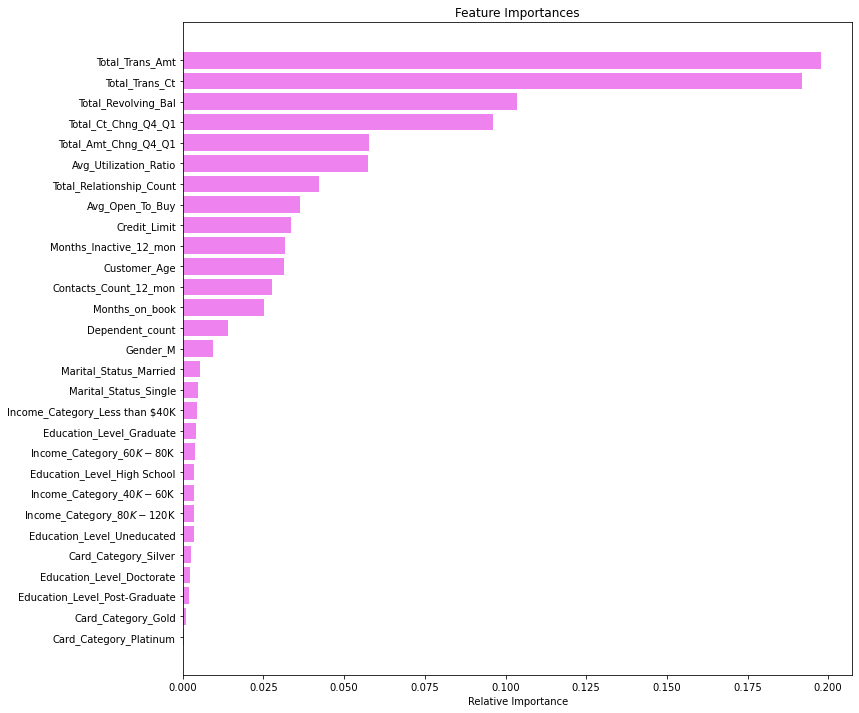

In [826]:
# Visualize important features to our model
importances = gb_tuned_rand_un.named_steps['gradientboostingclassifier'].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [X_train_un.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation

- Our Gradient Boost model on undersampled data tuned with RandomizedSearch gave us the best result on recall. The model generalized well as their is no overfitting on recall. 

- The model predicted that the top 2 most important features in predicting if a credit card customer will churn is Total_Trans_Amt, Total_Trans_Ct

### XGBoost 

### XGBoost GridSearchCV (Oversampled)

In [843]:
%%time
# Creating pipeline
pipe_xgb_grid_over = make_pipeline(StandardScaler(), XGBClassifier(eval_metric='logloss',random_state=1))

# Grid of parameters to choose from
param_grid = {'xgbclassifier__n_estimators': range(1,10,2), 
              'xgbclassifier__learning_rate': [0.01],
              'xgbclassifier__max_depth': [7,8,9],
              'xgbclassifier__min_child_weight':[1,3,5],
              'xgbclassifier__gamma':[1,1.5,2],
              'xgbclassifier__subsample':[0.7,0.8,0.9],
              'xgbclassifier__colsample_bytree':[0.8,0.9,1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(pipe_xgb_grid_over, param_grid, scoring=scorer,cv=5)

# Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
pipe_xgb_grid_over = grid_cv.best_estimator_

pipe_xgb_grid_over

Wall time: 21min 4s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, eval_metric='logloss',
                               gamma=1.5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=9,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [845]:
# Creating new pipeline with best parameters
xgb_tuned_grid_over = make_pipeline(
    StandardScaler(),XGBClassifier(colsample_bytree=0.8, eval_metric='logloss',
                               gamma=1.5,learning_rate=0.01,max_depth=9,
                               min_child_weight=1,n_estimators=9,random_state=1,subsample=0.9))

# Fit the model on training data
xgb_tuned_grid_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, eval_metric='logloss',
                               gamma=1.5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=9,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.980855435188644
Accuracy on test set :  0.9440585009140768
Recall on training set :  0.9895405304445275
Recall on test set :  0.8861047835990888
Precision on training set :  0.9726454929318891
Precision on test set :  0.790650406504065


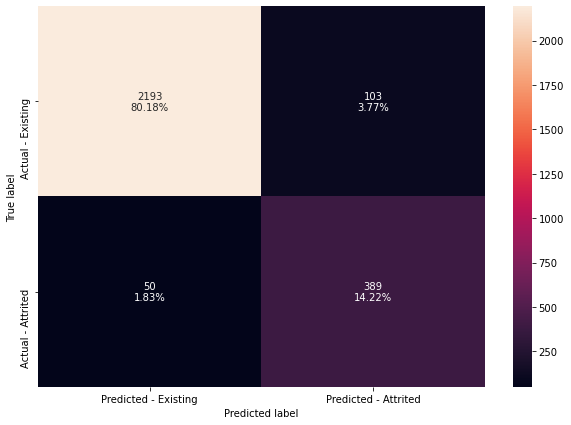

In [846]:
#Calculating different metrics
get_metrics_score(xgb_tuned_grid_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(xgb_tuned_grid_over,y_test)

### XGBoost RandomizedSearchCV (Oversampled)

In [870]:
%%time

# Creating pipeline
pipe_xgb_rand_over = make_pipeline(StandardScaler(), XGBClassifier(eval_metric='logloss',random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {'xgbclassifier__n_estimators': range(1,10,1), 
              'xgbclassifier__learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
              'xgbclassifier__max_depth': [9,10,11],
              'xgbclassifier__min_child_weight':[1,3,5],
              'xgbclassifier__gamma':[1,1.5,2],
              'xgbclassifier__subsample':[0.7,0.8,0.9],
              'xgbclassifier__colsample_bytree':[0.7,0.8,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_rand_cv = RandomizedSearchCV(estimator=pipe_xgb_rand_over, param_distributions=param_grid, n_iter=100, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
xgb_rand_cv.fit(X_train_over,y_train_over)

# Set the clf to the best combination of parameters
pipe_xgb_rand_over = xgb_rand_cv.best_estimator_

pipe_xgb_rand_over

Wall time: 1min 53s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.9, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=8,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [871]:
# Creating new pipeline with best parameters
xgb_tuned_rand_over = make_pipeline(
    StandardScaler(),XGBClassifier(colsample_bytree=0.9, eval_metric='logloss',
                               gamma=1,learning_rate=0.2,max_depth=10,
                               min_child_weight=3,n_estimators=8,random_state=1,subsample=0.8))

# Fit the model on training data
xgb_tuned_rand_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.9, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=8,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9830033619723572
Accuracy on test set :  0.9484460694698355
Recall on training set :  0.9886066492342174
Recall on test set :  0.8906605922551253
Precision on training set :  0.9776505356483192
Precision on test set :  0.8078512396694215


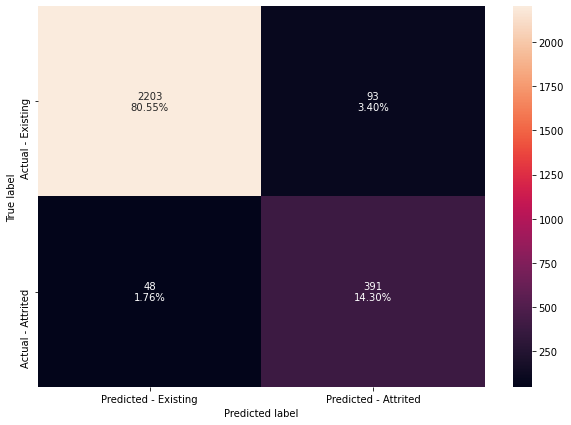

In [872]:
#Calculating different metrics
get_metrics_score(xgb_tuned_rand_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(xgb_tuned_rand_over,y_test)

### XGBoost GridSearchCV (Undersampled)

In [903]:
%%time
# Creating pipeline
pipe_xgb_grid_un = make_pipeline(StandardScaler(), XGBClassifier(eval_metric='logloss',random_state=1))

# Grid of parameters to choose from
param_grid = {'xgbclassifier__n_estimators': range(1,10,1), 
              'xgbclassifier__learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
              'xgbclassifier__max_depth': [12,13,14],
              'xgbclassifier__min_child_weight':[1,3,5],
              'xgbclassifier__gamma':[0.1,0.3,0.6],
              'xgbclassifier__subsample':[0.7,0.8,0.9],
              'xgbclassifier__colsample_bytree':[0.7,0.8,0.9]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_cv = GridSearchCV(pipe_xgb_grid_un, param_grid, scoring=scorer,cv=5)

# Fitting parameters in GridSeachCV
grid_cv = grid_cv.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
pipe_xgb_grid_un = grid_cv.best_estimator_

pipe_xgb_grid_un

Wall time: 1.46 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, eval_metric='logloss',
                               gamma=0.3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=13,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=7,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [904]:
# Creating new pipeline with best parameters
xgb_tuned_grid_un = make_pipeline(
    StandardScaler(),XGBClassifier(colsample_bytree=0.8, eval_metric='logloss',
                               gamma=0.3,learning_rate=0.2,max_depth=13,
                               min_child_weight=1,n_estimators=7,random_state=1,subsample=0.9))

# Fit the model on training data
xgb_tuned_grid_un.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, eval_metric='logloss',
                               gamma=0.3, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=13,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=7,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9834146341463414
Accuracy on test set :  0.9308957952468008
Recall on training set :  0.9882926829268293
Recall on test set :  0.9521640091116174
Precision on training set :  0.978743961352657
Precision on test set :  0.7133105802047781


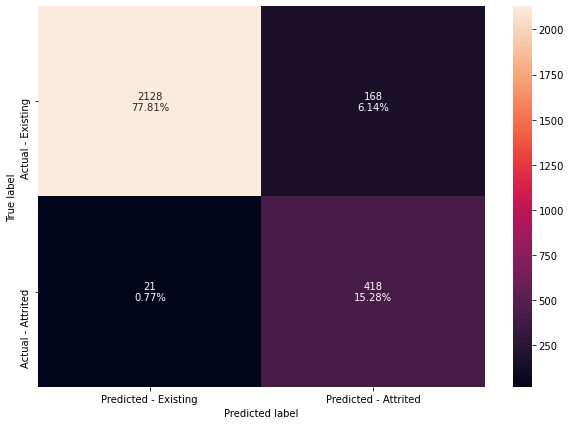

In [905]:
#Calculating different metrics
get_metrics_score(xgb_tuned_grid_un,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(xgb_tuned_grid_un,y_test)

### XGBoost RandomizedSearchCV (Undersampled)

In [939]:
%%time

# Creating pipeline
pipe_xgb_rand_un = make_pipeline(StandardScaler(), XGBClassifier(eval_metric='logloss',random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {'xgbclassifier__n_estimators': range(1,10,1), 
              'xgbclassifier__learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
              'xgbclassifier__max_depth': range(1,10,1),
              'xgbclassifier__min_child_weight':[1,2,3],
              'xgbclassifier__gamma':[0.1,0.2,0.3],
              'xgbclassifier__subsample':[0.7,0.8,0.9],
              'xgbclassifier__colsample_bytree':[0.7,0.8,0.9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_rand_cv = RandomizedSearchCV(estimator=pipe_xgb_rand_un, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
xgb_rand_cv.fit(X_train_un,y_train_un)

# Set the clf to the best combination of parameters
pipe_xgb_rand_un = xgb_rand_cv.best_estimator_

pipe_xgb_rand_un

Wall time: 15.2 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.9, eval_metric='logloss',
                               gamma=0.2, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=2, missing=nan,
                               monotone_constraints='()', n_estimators=2,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [948]:
# Creating new pipeline with best parameters
xgb_tuned_rand_un = make_pipeline(
    StandardScaler(),XGBClassifier(colsample_bytree=0.9, eval_metric='logloss',
                               gamma=0.2,learning_rate=0.05,max_depth=2,
                               min_child_weight=2,n_estimators=2,random_state=1,subsample=0.8))

# Fit the model on training data
xgb_tuned_rand_un.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.9, eval_metric='logloss',
                               gamma=0.2, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=2, missing=nan,
                               monotone_constraints='()', n_estimators=2,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7809756097560976
Accuracy on test set :  0.640219378427788
Recall on training set :  0.9609756097560975
Recall on test set :  0.9635535307517085
Precision on training set :  0.706599713055954
Precision on test set :  0.304097771387491


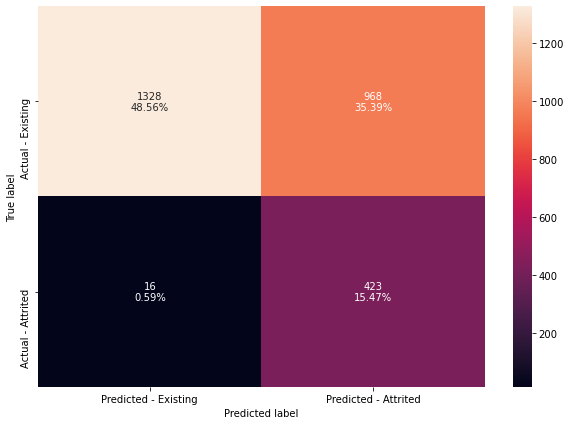

In [949]:
#Calculating different metrics
get_metrics_score(xgb_tuned_rand_un,X_train_un,X_test,y_train_un,y_test)

# creating confusion matrix
make_confusion_matrix(xgb_tuned_rand_un,y_test)

### Plotting the feature importance of each variable

In [950]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgb_tuned_rand_un.named_steps['xgbclassifier'].feature_importances_, columns = ["Importance"], index = X_train_un.columns).sort_values(by = 'Importance', ascending = False))

                                Importance
Total_Trans_Ct                    0.664322
Total_Revolving_Bal               0.171173
Total_Trans_Amt                   0.164505
Customer_Age                      0.000000
Education_Level_Graduate          0.000000
Card_Category_Platinum            0.000000
Card_Category_Gold                0.000000
Income_Category_Less than $40K    0.000000
Income_Category_$80K - $120K      0.000000
Income_Category_$60K - $80K       0.000000
Income_Category_$40K - $60K       0.000000
Marital_Status_Single             0.000000
Marital_Status_Married            0.000000
Education_Level_Uneducated        0.000000
Education_Level_Post-Graduate     0.000000
Education_Level_High School       0.000000
Gender_M                          0.000000
Education_Level_Doctorate         0.000000
Dependent_count                   0.000000
Avg_Utilization_Ratio             0.000000
Total_Ct_Chng_Q4_Q1               0.000000
Total_Amt_Chng_Q4_Q1              0.000000
Avg_Open_To

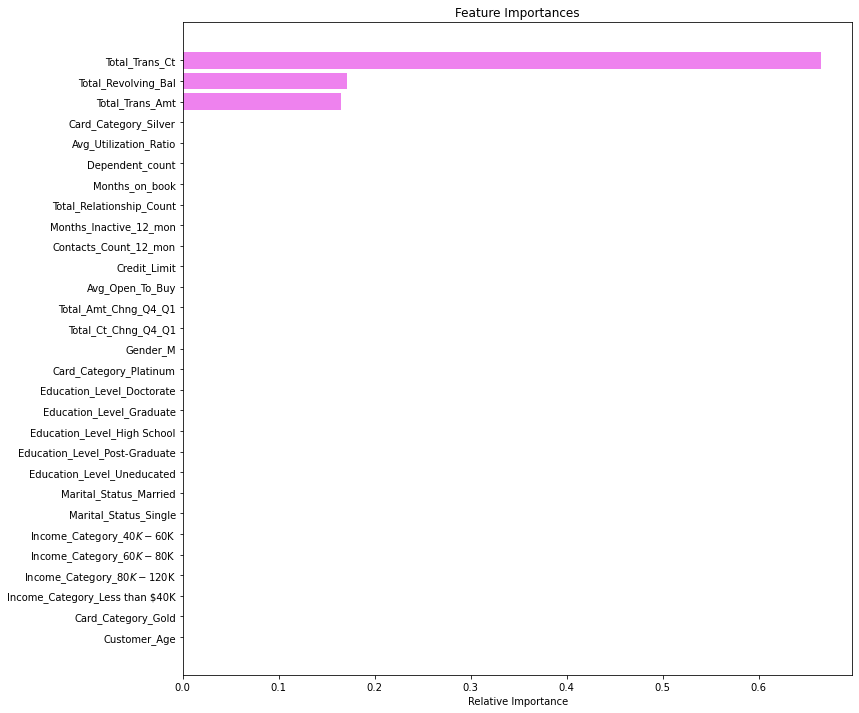

In [951]:
# Visualize important features to our model
importances = xgb_tuned_rand_un.named_steps['xgbclassifier'].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [X_train_un.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation

- Our XGBoost model on undersampled data tuned with RandomizedSearch gave us the best result on recall. The model generalized well as their is no overfitting on recall. This model also had a better recall performance on test than on train which is a rare occurence. This is our best model and is fit to use in production

- The model predicted that Total_Trans_Ct is the most important feature in predicting if a credit card customer will churn. is Total_Revolving_Bal and Total_Trans_Amt are also important but not to the extent of Total_Trans_Ct

### 2.7 Comparing all models

In [1233]:
# defining list of models
models = [pipe_lr]

# defining empty lists to add train and test results
acc_train1 = []
acc_test1 = []
recall_train1 = []
recall_test1 = []
precision_train1 = []
precision_test1 = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, X_train,X_test,y_train,y_test,False)
    acc_train1.append(j[0])
    acc_test1.append(j[1])
    recall_train1.append(j[2])
    recall_test1.append(j[3])
    precision_train1.append(j[4])
    precision_test1.append(j[5])

In [1235]:
# defining list of models
over_models = [pipe_lr_over,pipe_lr_over_reg,rf_tuned_grid_over,rf_tuned_rand_over,gb_tuned_grid_over,gb_tuned_rand_over,
          xgb_tuned_grid_over,xgb_tuned_rand_over]

# defining empty lists to add train and test results
acc_train2 = []
acc_test2 = []
recall_train2 = []
recall_test2 = []
precision_train2 = []
precision_test2 = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in over_models:

    j = get_metrics_score(model, X_train_over,X_test,y_train_over,y_test,False)
    acc_train2.append(j[0])
    acc_test2.append(j[1])
    recall_train2.append(j[2])
    recall_test2.append(j[3])
    precision_train2.append(j[4])
    precision_test2.append(j[5])

In [1237]:
# defining list of models
under_models = [pipe_lr_under,abc_tuned_grid_un,abc_tuned_rand_un,gb_tuned_grid_un,gb_tuned_rand_un,xgb_tuned_grid_un,
          xgb_tuned_rand_un]

# defining empty lists to add train and test results
acc_train3 = []
acc_test3 = []
recall_train3 = []
recall_test3 = []
precision_train3 = []
precision_test3 = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in under_models:

    j = get_metrics_score(model, X_train_un,X_test,y_train_un,y_test,False)
    acc_train3.append(j[0])
    acc_test3.append(j[1])
    recall_train3.append(j[2])
    recall_test3.append(j[3])
    precision_train3.append(j[4])
    precision_test3.append(j[5])

In [1241]:
#Append all models
acc_train= acc_train1 + acc_train2 + acc_train3
acc_test= acc_test1 + acc_test2 + acc_test3
recall_train = recall_train1 + recall_train2 + recall_train3
recall_test = recall_test1 + recall_test2 + recall_test3
precision_train = precision_train1 + precision_train2 + precision_train3
precision_test = precision_test1 + precision_test2 + precision_test3

In [1244]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Oversampled Logistic Regression',
                                          'Oversampled Logistic Regression Regularized','Oversampled GridSearch Random Forest',
                                          'Oversampled RandomizedSearch Random Forest',
                                          'Oversampled GridSearch Gradient Boosting Classifier', 
                                          'Oversampled RandomizedSearch Gradient Boosting Classifier',
                                          'Oversampled GridSearch XGBoost Classifier',
                                          'Oversampled RandomizedSearch XGBoost Classifier',
                                          'Undersampled Logistic Regression',
                                          'Undersampled GridSearch AdaBoost Classifier',
                                          'Undersampled RandomizedSearch AdaBoost Classifier',
                                          'Undersampled GridSearch Gradient Boosting Classifier',
                                          'Undersampled RandomizedSearch Gradient Boosting Classifier', 
                                          'Undersampled GridSearch XGBoost Classifier',
                                          'Undersampled RandomizedSearch XGBoost Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.903433,0.904205,0.580488,0.576310,0.761844,0.768997
1,Oversampled Logistic Regression,0.916137,0.887386,0.909414,0.665148,0.921810,0.644592
2,Oversampled Logistic Regression Regularized,0.916418,0.888483,0.909787,0.667426,0.922014,0.648230
3,Oversampled GridSearch Random Forest,0.987206,0.946252,0.991035,0.845103,0.983503,0.824444
4,Oversampled RandomizedSearch Random Forest,0.984684,0.946618,0.988046,0.847380,0.981447,0.824834
5,Oversampled GridSearch Gradient Boosting Class...,0.994023,0.950640,0.996078,0.842825,0.992001,0.848624
6,Oversampled RandomizedSearch Gradient Boosting...,0.995050,0.952468,0.995704,0.847380,0.994404,0.855172
7,Oversampled GridSearch XGBoost Classifier,0.980855,0.944059,0.989541,0.886105,0.972645,0.790650
8,Oversampled RandomizedSearch XGBoost Classifier,0.983003,0.948446,0.988607,0.890661,0.977651,0.807851
9,Undersampled Logistic Regression,0.849756,0.839488,0.852683,0.838269,0.847721,0.500000


### Observations

- Oversampled Logistic Regression models had a poor recall performance even after regularization. These models did not generalize well on test data. There was however improved performance after undersampling giving a much better performance on recall and also generalizing well on test data.  


- All our models developed with oversampled data did not generalize well on test data. Part of the reason why this would have occured is the creation of sythetic data when oversampling. 

- Our undersampled models generaliized alot better than our oversampled models on recall.


- Tuning our models with RandomizedSearch was computationally less expensive than with GridSearch. RandomizedSearch Models also performed better than GridSearch models with the exception of our AdaBoost Classifiers.


- Our best model was the Undersampled RandomizedSearch XGBoost Classifier with a Test Recall score of 0.963554.


- There may be yet better parameters which may result in a better performance for all models.

We will go ahead and run our Undersampled RandomizedSearch XGBoost Classifier on hold out data(data the model hasn't seen before) which will give us a general idea of how the model will perform in production

### 2.8 Model Validation on Unseen Data

In [1249]:
X_unseen.head() # First 5 rows of unseen data

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,40.0,3.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.175,...,1,1,0,0,1,0,0,0,0,0
1,44.0,2.0,36.0,3.0,1.0,2.0,4010.0,1247.0,2763.0,1.376,...,0,1,0,1,0,0,0,0,0,0
2,48.0,2.0,36.0,6.0,3.0,3.0,11656.0,1677.0,9979.0,1.524,...,0,0,1,0,0,1,0,0,0,0
3,49.0,4.0,36.0,6.0,4.0,2.0,3298.0,2200.0,1098.0,0.678,...,0,1,0,0,0,0,1,0,0,0
4,53.0,2.0,44.0,4.0,2.0,2.0,14734.0,1634.0,13100.0,0.989,...,0,0,1,0,0,0,0,0,0,0


In [1250]:
# Shape of unseen data
print(X_unseen.shape)
print(y_unseen.shape)

(1013, 29)
(1013, 1)


In [1253]:
# Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_unseen)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Existing","Actual - Attrited"]],
                  columns = [i for i in ['Predicted - Existing','Predicted - Attrited']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1254]:
# Creating new pipeline with best parameters
xgb_tuned_rand_un = make_pipeline(
    StandardScaler(),XGBClassifier(colsample_bytree=0.9, eval_metric='logloss',
                               gamma=0.2,learning_rate=0.05,max_depth=2,
                               min_child_weight=2,n_estimators=2,random_state=1,subsample=0.8))

# Fit the model on unseen data
xgb_tuned_rand_un.fit(X_train_un, y_train_un)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.9, eval_metric='logloss',
                               gamma=0.2, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=2, missing=nan,
                               monotone_constraints='()', n_estimators=2,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7809756097560976
Accuracy on test set :  0.6683119447186574
Recall on training set :  0.9609756097560975
Recall on test set :  0.9631901840490797
Precision on training set :  0.706599713055954
Precision on test set :  0.32238193018480493


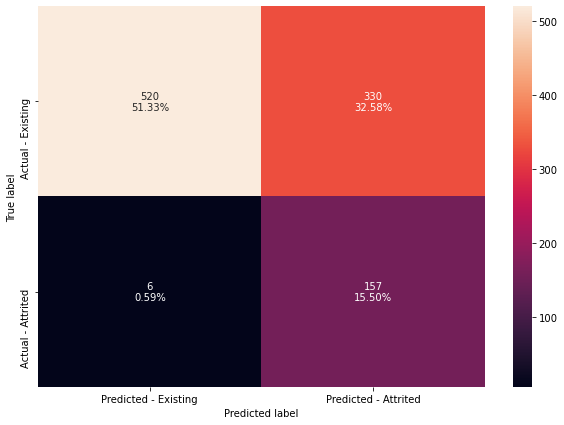

In [1255]:
#Calculating different metrics
get_metrics_score(xgb_tuned_rand_un,X_train_un,X_unseen,y_train_un,y_unseen)

# creating confusion matrix
make_confusion_matrix(xgb_tuned_rand_un,y_unseen)

### Observations
- Our final model, xgb_tuned_rand_un performed well with a recall score of 0.9631901840490797 after running it on hold out data. What this means is that this model is able to identify customers that will attrite/churn 96% of the time

### 2.9 Recommendations and Conclusions

Our Undersampled RandomizedSearch XGBoost model gave us the best recall score which is the important metric in evaluating this particular classification problem as earlier explained. As such, we will go ahead and recommend this model as a basis for identifying credit card customers that are most likely to churn.

From this information, we can build a customer profile of potential customers who are likely to churn. The most important feature in predicting if a credit card customer will churn according to our model is Total Revolving Balance. This the total payable amount carried over month over month by the banks credit card customers. From our Exploratory Data Analysis, we discovered that customers who had low to zero Total Revolving Balance were more likely to churn. Total Transaction Amount and Number of Total Transactions were also important features in predicting if a customer will churn as identified by the model. Customers with low total transaction amount and also low number of transactions carried out with their credit card in the last 12 months were more likely to churn as identified in our EDA. 

Retaining existing customers and thereby increasing their lifetime value is something every business considers important. There is little a bank can do about customer churn when they don’t see it coming in the first place. This is why predicting customer churn early enough is important especially when clear customer feedback is unavailable. Early and accurate churn prediction empowers the banks CRM and customer experience teams to be creative and proactive in their engagement with the customer. By reaching out to them alone, the bank will have greatly reduced the chances of churn for some customers. A model like ours allows the bank to do this and be accurate 96% of the time.Such a model is the first step in a potential customer 360 view. It can serve as a foundation for other use cases such as cross-sell/upsell recommendation, customer lifetime value calculation, etc. 